# CREDIT EDA CASE STUDY

### Problem Statement

The objective of this EDA report is to analyze the data collected by bank over its customers and derive insights using various governing variables which tend to affect a target variable which here is wheather a customer is tend to default on repaying a certain loan amount.
The modelling done over this analysis will help the bank to judge a likelihood that its customer will tend to default or not.

### Loading Libraries

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Setting output parameters for dataset.

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('float_format','{:f}'.format)

## DATA UNDERSTANDING

In [4]:
# Importing application dataset

curr_app = pd.read_csv('application_data.csv')  #Creating curr_app dataframe from external csv file.

curr_app.head()  # Printing top 5 rows.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

### Checking Structure of Data

In [5]:
# Check the number of rows and columns in the dataframe

print("No of rows = ",len(curr_app.axes[0]))     # Calculating no. of rows.
                                               # axes[0] is used for rows.

print("No of columns = ",len(curr_app.axes[1]))  # Calculating no. of columns.
                                               # axes[1] is used for columns.

No of rows =  307511
No of columns =  122


In [6]:
# Check the Dimensions of the dataframe

print("Dimension = ",curr_app.ndim) # Returns dimension of dataframe. 
                                  #1 for one dimension (series), 2 for two dimension (dataframe).

# Check size of dataframe

print("Size = ",curr_app.size)      # Returns size of dataframe which is equivalent to total number of elements i.e.row*Column .                             


#Check shape of dataframe

print("Shape = ",curr_app.shape)    # Returns tuple of shape (Rows, columns) of dataframe

Dimension =  2
Size =  37516342
Shape =  (307511, 122)


In [7]:
# Displaying names of columns present in the dataset.

curr_app.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
# Finding the description of columns in the dataset

curr_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [9]:
#  Finding the data types of variables present in the dataset.

curr_app.dtypes.value_counts() # Returns us the count of occurences of each of the unique values in this column.

float64    65
int64      41
object     16
dtype: int64

In [10]:
curr_app.nunique()  # returns series with number of distinct observations over column axis.

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [11]:
#  Finding the distribution of numerical variables.

curr_app.describe()  # Returns some basic statistical details.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

In [12]:
## Unique values in each columns of data set

curr_app.agg('nunique')   # returns series with number of distinct observations over column axis.

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [13]:
# Checking null values in columns of each dataset:

curr_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## DATA CLEANING

### Checking and dropping columns with high number of null values .

In [14]:
# Custom function to return null values and percentage null:

def null_count(inp):
    null = inp.isnull().sum()
    percentage_null = (inp.isnull().sum()/inp.shape[0])*100
    return pd.concat([null,percentage_null],keys = ["Null","Percentage_Null"],axis = 1)

In [15]:
# Function call which returns null values and percentage null:

curr_app_null = null_count(curr_app)
curr_app_null.sort_values(by = "Percentage_Null",ascending = False)

,Null,Percentage_Null
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


**Taking a threshold of 50% for null values and checking columns having null values above that**

In [16]:
# Displaying columns with more than 50% null values

curr_app_null[(curr_app_null.Percentage_Null > 50)].sort_values(by = "Percentage_Null",ascending = False)

,Null,Percentage_Null
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


We can see from this there are almost 40-50 columns which have null percentage over 50%.

**We'll drop these columns with high null values, as it will be difficult to carry on analysis with this much amount of null values and also no proper values can be imputed in their places.**

In [17]:
# Dropping the columns with more than 50% of null values

L1 = list(curr_app_null[(curr_app_null.Percentage_Null > 50)].index)
curr_app.drop(L1,axis = 1 , inplace=True)

In [18]:
curr_app.head()   # Displaying top 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,nan,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.000000,-2531,1,1,1,1,1,0,Laborers,1.000000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-815.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.000000,-2437,1,1,0,1,0,0,Laborers,2.000000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000000,0.000000,2.000000,0.000000,-617.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.000000,-3458,1,1,0,1,0,0,Core staff,1.000000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000000,0.000000,0.000000,0.000000,-1106.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
# Displaying number of rows and columns current application dataframe i.e.curr_app

curr_app.shape   # Returns tuple of shape (Rows, columns) of dataframe

(307511, 81)

Now we are left with 81 columns with null values less than 50% .

#### IMPUTATION OF VALUES FOR THE REMAINING NULL VALUE COLUMNS.

_Let's consider the columns with null value percentage in the range 0 and 15_

In [20]:
# First we'll check for columns having less percentage i.e >0 & <15% of null values

curr_app_null[(curr_app_null.Percentage_Null >0) & (curr_app_null.Percentage_Null < 15)].sort_values(by = "Percentage_Null",ascending = False)

,Null,Percentage_Null
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [21]:
# Checking datatypes for columns having less percentage i.e >0 & <15% of null values

curr_app[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].dtypes

AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
NAME_TYPE_SUITE                object
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
EXT_SOURCE_2                  float64
AMT_GOODS_PRICE               float64
AMT_ANNUITY                   float64
CNT_FAM_MEMBERS               float64
DAYS_LAST_PHONE_CHANGE        float64
dtype: object

In [22]:
# Checking some basic statistical details for columns having less percentage i.e >0 & <15% of null values.

curr_app[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,306851.000000,307233.000000,307499.000000,307509.000000,307510.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.422245,0.143421,1.405292,0.100049,0.514393,538396.207429,27108.573909,2.152665,-962.858788
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,2.400989,0.446698,2.379803,0.362291,0.191060,369446.460540,14493.737315,0.910682,826.808487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40500.000000,1615.500000,1.000000,-4292.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392457,238500.000000,16524.000000,2.000000,-1570.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.565961,450000.000000,24903.000000,2.000000,-757.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.663617,679500.000000,34596.000000,3.000000,-274.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,348.000000,34.000000,344.000000,24.000000,0.855000,4050000.000000,258025.500000,20.000000,0.000000


#### NAME_TYPE_SUITE

In [23]:
curr_app.NAME_TYPE_SUITE.value_counts()  # Returns us the count of occurences of each of the unique values in this column.

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### From above we can see that NAME_TYPE_SUITE is categorical variable and hence its null values can be imputed by "mode" technique.
##### i.e with value : "Unaccompanied".

In [24]:
curr_app.NAME_TYPE_SUITE.mode()  # Obtaining mode value for this column.

0    Unaccompanied
dtype: object

#### Number of enquiries to Credit Bureau
The below columns represent the number of enquiries to Credit Bureau about the client made at certain time period before the application. We come to know that these columns consists of same number of null values (41519):
- _AMT_REQ_CREDIT_BUREAU_HOUR_
- _AMT_REQ_CREDIT_BUREAU_DAY_
- _AMT_REQ_CREDIT_BUREAU_WEEK_
- _AMT_REQ_CREDIT_BUREAU_MON_
- _AMT_REQ_CREDIT_BUREAU_QRT_
- _AMT_REQ_CREDIT_BUREAU_YEAR_

In [25]:

AMT_REQ = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
curr_app[AMT_REQ].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


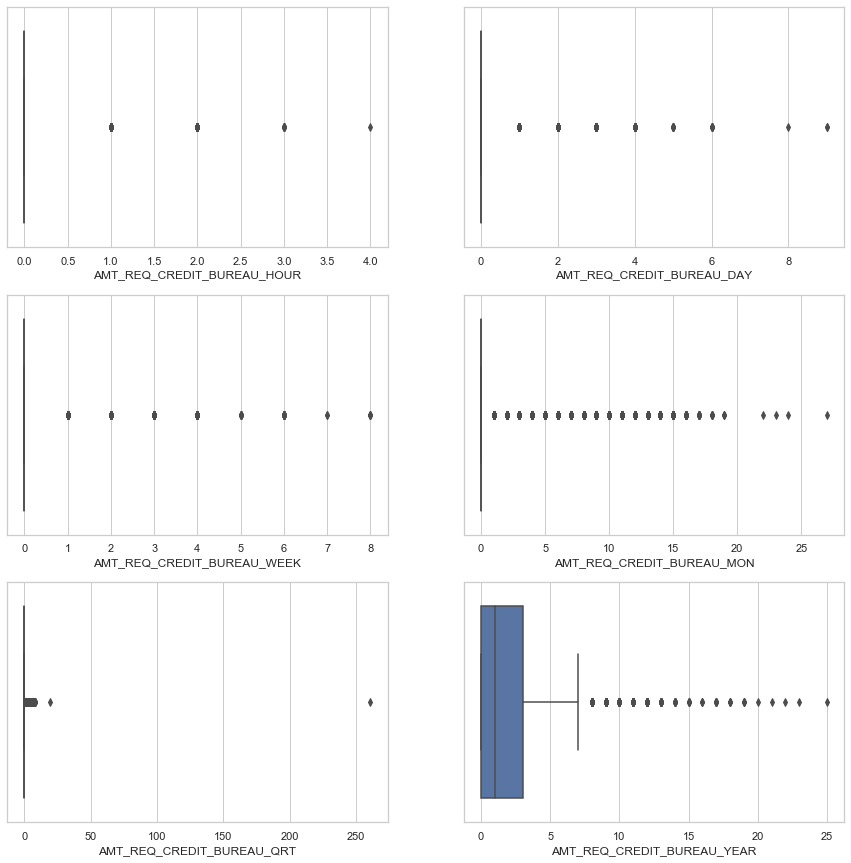

In [26]:
plt.figure(figsize = (15, 15))

for i in enumerate(AMT_REQ):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(curr_app[i[1]])

#### OUTLIER CHECK__:
###### With the above plot we can see that :

'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
are having outliers within them and null values should be handled by taking the *_"median"_* technique.

In [27]:
# median values that can be imputed for the above BUREAU columns:

curr_app[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].agg("median")

AMT_REQ_CREDIT_BUREAU_HOUR   0.000000
AMT_REQ_CREDIT_BUREAU_DAY    0.000000
AMT_REQ_CREDIT_BUREAU_WEEK   0.000000
AMT_REQ_CREDIT_BUREAU_MON    0.000000
AMT_REQ_CREDIT_BUREAU_QRT    0.000000
AMT_REQ_CREDIT_BUREAU_YEAR   1.000000
dtype: float64

#### Social Surrounding Count
The following columns have over 1000 null values each and give information about the defaulting nature of the client's social surroundings:
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [28]:

SOCIAL_CIRCLE = ['OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE']

curr_app[SOCIAL_CIRCLE].describe()



,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


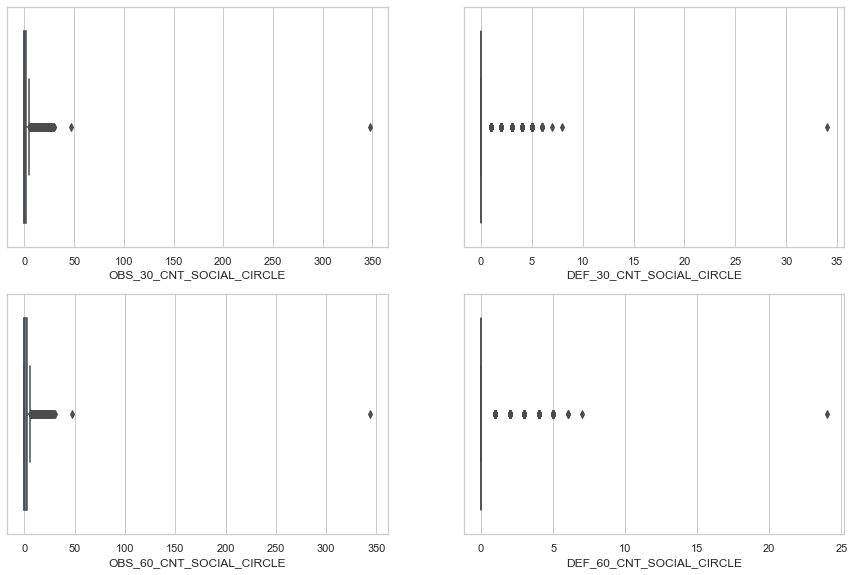

In [29]:
plt.figure(figsize = (15, 15))
for i in enumerate(SOCIAL_CIRCLE):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(curr_app[i[1]])

##### As per the above plot we can conclude that the columns:
'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
are having outliers within them and null values should be handled by taking the *_"median"_* technique.

In [30]:
# median values that can be imputed for the above SOCIAL_CIRCLE columns:

curr_app[['OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE']].agg("median")

OBS_30_CNT_SOCIAL_CIRCLE   0.000000
DEF_30_CNT_SOCIAL_CIRCLE   0.000000
OBS_60_CNT_SOCIAL_CIRCLE   0.000000
DEF_60_CNT_SOCIAL_CIRCLE   0.000000
dtype: float64

#### EXT_SOURCE_2

In [31]:

curr_app.EXT_SOURCE_2.describe()


count   306851.000000
mean         0.514393
std          0.191060
min          0.000000
25%          0.392457
50%          0.565961
75%          0.663617
max          0.855000
Name: EXT_SOURCE_2, dtype: float64

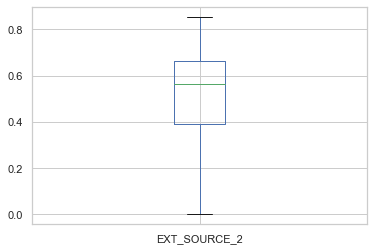

In [32]:
# Checking for EXT_SOURCE_2

curr_app.EXT_SOURCE_2.plot.box()
plt.show()

##### EXT_SOURCE_2 : No outliers exist in the column and null values can be imputed by taking the mean value 
which we saw from the describe function above and it comes out to be : "0.514393".

#### AMT_GOODS_PRICE


In [33]:

curr_app.AMT_GOODS_PRICE.describe()


count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

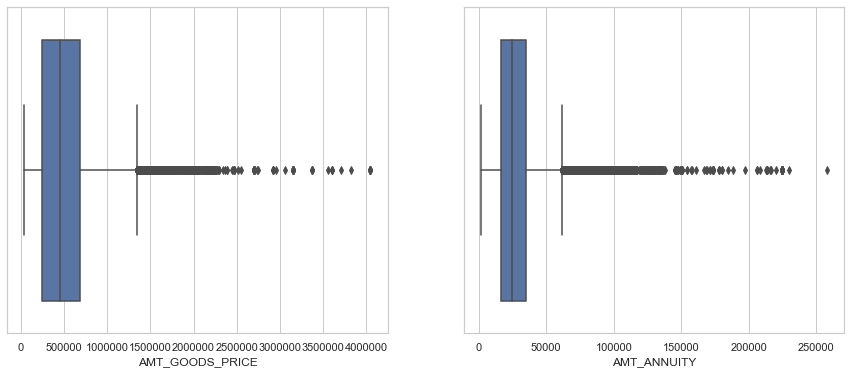

In [34]:
# checking 'AMT_GOODS_PRICE','AMT_ANNUITY' variables:

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(curr_app['AMT_GOODS_PRICE'])
plt.subplot(1,2,2)
sns.boxplot(curr_app['AMT_ANNUITY'])
plt.show()

Since from above plot and describe function we saw that their is huge differnce between minimum and maximum values of AMOUNT column. Hence null values can be imputed by taking "MEDIAN".

In [35]:
# median values for Amount columns:

curr_app[['AMT_GOODS_PRICE','AMT_ANNUITY']].agg("median")

AMT_GOODS_PRICE   450000.000000
AMT_ANNUITY        24903.000000
dtype: float64

#### CNT_FAM_MEMBERS

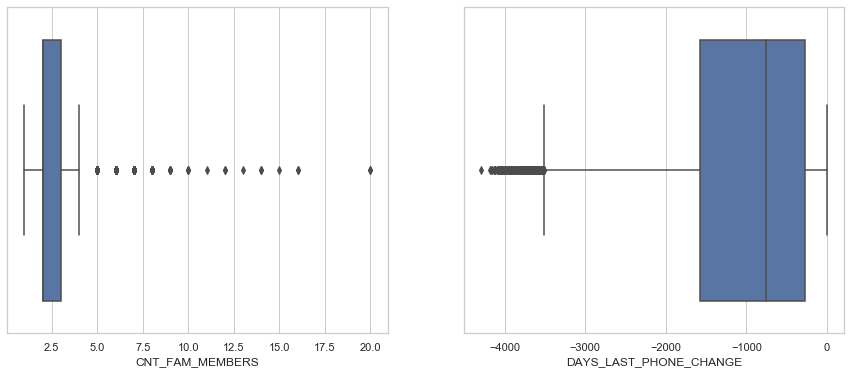

In [36]:
# checking 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' variables:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(curr_app['CNT_FAM_MEMBERS'])
plt.subplot(1,2,2)
sns.boxplot(curr_app['DAYS_LAST_PHONE_CHANGE'])
plt.show()

We can see that 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' are also having outliers Null values need to be taken care by MEDIAN values.

In [37]:
# median values for 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'

curr_app[['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].agg("median")

CNT_FAM_MEMBERS             2.000000
DAYS_LAST_PHONE_CHANGE   -757.000000
dtype: float64

### we  can  now proceed  with  selection of  governing  variables (along with TARGET variable) for  analysis  to  derive  meaningful insights.



## DATA MANUPULATION:

### Based on our understanding of data we have selected following columns for our analysis

In [38]:
curr_attr = curr_app[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 
                'EXT_SOURCE_2', 'EXT_SOURCE_3',"HOUR_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START"]]
curr_attr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START
0,100002,1,Cash loans,M,N,Y,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376,10,WEDNESDAY
1,100003,0,Cash loans,F,N,N,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,1,1,0,0,0,School,0.622246,nan,11,MONDAY
2,100004,0,Revolving loans,M,Y,Y,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,2,2,0,0,0,Government,0.555912,0.729567,9,MONDAY
3,100006,0,Cash loans,F,N,Y,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,2,2,0,0,0,Business Entity Type 3,0.650442,nan,17,WEDNESDAY
4,100007,0,Cash loans,M,N,Y,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,2,2,0,1,1,Religion,0.322738,nan,11,THURSDAY


In [39]:
curr_num = curr_attr # Making copy of curr_attr dataframe to proceed analysis and for future use.

In [40]:
# Check the Dimensions of the dataframe

print("Dimension = ",curr_attr.ndim) # Returns dimension of dataframe. 
                                  #1 for one dimension (series), 2 for two dimension (dataframe).

# Check size of dataframe

print("Size = ",curr_attr.size)      # Returns size of dataframe which is equivalent to total number of elements i.e.row*Column .                             


#Check shape of dataframe

print("Shape = ",curr_attr.shape)    # Returns tuple of shape (Rows, columns) of dataframe

Dimension =  2
Size =  8917819
Shape =  (307511, 29)


In [41]:
curr_attr.describe()  # Returns some basic statistical details.

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306851.000000,246546.000000,307511.000000
mean,278180.518577,0.080729,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,2.152665,2.052463,2.031521,0.078173,0.230454,0.179555,0.514393,0.510853,12.063419
std,102790.175348,0.272419,237123.146279,402490.776996,14493.737315,369446.460540,0.013831,4363.988632,141275.766519,0.910682,0.509034,0.502737,0.268444,0.421124,0.383817,0.191060,0.194844,3.265832
min,100002.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,0.000290,-25229.000000,-17912.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.000000
25%,189145.500000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,0.010006,-19682.000000,-2760.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.392457,0.370650,10.000000
50%,278202.000000,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,0.018850,-15750.000000,-1213.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.565961,0.535276,12.000000
75%,367142.500000,0.000000,202500.000000,808650.000000,34596.000000,679500.000000,0.028663,-12413.000000,-289.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.663617,0.669057,14.000000
max,456255.000000,1.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,0.072508,-7489.000000,365243.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.896010,23.000000


In [42]:
curr_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [43]:
# function for unique and dtypes:

def zval(df):
    
    uniques = pd.DataFrame(df.agg("nunique"),columns = ["unique"])
    datatypes = pd.DataFrame(df.dtypes,columns = ["dtype"])
    inp1 = pd.concat([uniques,datatypes],axis = 1)
    return inp1

zval(curr_attr)

,unique,dtype
SK_ID_CURR,307511,int64
TARGET,2,int64
NAME_CONTRACT_TYPE,2,object
CODE_GENDER,3,object
FLAG_OWN_CAR,2,object
FLAG_OWN_REALTY,2,object
AMT_INCOME_TOTAL,2548,float64
AMT_CREDIT,5603,float64
AMT_ANNUITY,13672,float64
AMT_GOODS_PRICE,1002,float64


**There are some columns which are categorical in nature but still having int64 as datatype, so we need to convert these columns into object datatype.**

In [44]:
inp0 = zval(curr_attr)

In [45]:
L2 = list(inp0[(inp0.unique == 2) & (inp0.dtype == 'int64')].index)
L2

['TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [46]:
# converting numeric to categorical columns:
for i in L2:
    curr_attr.loc[:,i].replace((0,1),("N","Y"),inplace = True)
    
zval(curr_attr)

,unique,dtype
SK_ID_CURR,307511,int64
TARGET,2,object
NAME_CONTRACT_TYPE,2,object
CODE_GENDER,3,object
FLAG_OWN_CAR,2,object
FLAG_OWN_REALTY,2,object
AMT_INCOME_TOTAL,2548,float64
AMT_CREDIT,5603,float64
AMT_ANNUITY,13672,float64
AMT_GOODS_PRICE,1002,float64


In [47]:
# Code_gender:

curr_attr.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
# dropping rows where gender is XNA:

curr_attr = curr_attr[curr_attr.CODE_GENDER != "XNA"]
curr_attr.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

Now their are few more columns which are having few unique values but are having datatype as integer.
From above dataframe we saw that REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY	are those columns.

In [49]:
# checking values in REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY and converting to object type variable:
curr_attr.REGION_RATING_CLIENT.value_counts()

2    226981
3     48329
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [50]:
curr_attr.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229481
3     43859
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [51]:
# replacing value rating as (3,2,1) to (low,medium,high): 
# 

for i in ["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]:
    curr_attr.loc[:,i].replace((3,2,1),("low","medium","high"),inplace =True)
zval(curr_attr)

,unique,dtype
SK_ID_CURR,307507,int64
TARGET,2,object
NAME_CONTRACT_TYPE,2,object
CODE_GENDER,2,object
FLAG_OWN_CAR,2,object
FLAG_OWN_REALTY,2,object
AMT_INCOME_TOTAL,2548,float64
AMT_CREDIT,5603,float64
AMT_ANNUITY,13672,float64
AMT_GOODS_PRICE,1002,float64


Now we have rectified the data types , lets check which variables are categorical and numerical:

In [52]:
#CATEGORICAL:

curr_attr.select_dtypes('object').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [53]:
# NUMERIC:

curr_attr.select_dtypes(["int64","float64"]).columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

#### BINNING OF CONTINUOUS VARIABLES:

As we saw Amount variables consist of outliers as well , it will be better if we bin Amount related columns

In [54]:
#checking value distribution for amount variables:

curr_attr[["AMT_INCOME_TOTAL", 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307507.000000,307507.000000,307495.000000,307229.000000
mean,168797.685779,599028.596733,27108.666786,538397.724489
std,237124.627320,402492.601859,14493.798379,369447.246462
min,25650.000000,45000.000000,1615.500000,40500.000000
25%,112500.000000,270000.000000,16524.000000,238500.000000
50%,147150.000000,513531.000000,24903.000000,450000.000000
75%,202500.000000,808650.000000,34596.000000,679500.000000
max,117000000.000000,4050000.000000,258025.500000,4050000.000000


In [55]:
#AMT_INCOME_TOTAL:

curr_attr.AMT_INCOME_TOTAL =  pd.cut(curr_attr.AMT_INCOME_TOTAL,[25000,75000,125000,175000,225000,275000,118000000], 
       labels = ["low","below_avg","avg","above_avg","high","very_high"])
curr_attr.AMT_INCOME_TOTAL.value_counts()

below_avg    83507
avg          82551
above_avg    70440
very_high    27045
low          23892
high         20072
Name: AMT_INCOME_TOTAL, dtype: int64

In [56]:
#AMT_CREDIT:
curr_attr.AMT_CREDIT =  pd.cut(curr_attr.AMT_CREDIT,bins = [45000,195000,345000,495000,645000,795000,4050000], 
       labels = ["low","below_avg","avg","above_avg","high","very_high"])


In [57]:
#AMT_ANNUITY:
curr_attr.AMT_ANNUITY =  pd.cut(curr_attr.AMT_ANNUITY,[1600,46600,91600,136600,181600,226600,270600], 
       labels = ["low","below_avg","avg","above_avg","high","very_high"])

In [58]:
#AMT_GOODS_PRICE:
curr_attr.AMT_GOODS_PRICE =  pd.cut(curr_attr.AMT_GOODS_PRICE,[40000,195000,345000,495000,645000,795000,4050000], 
       labels = ["low","below_avg","avg","above_avg","high","very_high"])
curr_attr.AMT_GOODS_PRICE.value_counts()

below_avg    74600
avg          66454
very_high    63499
high         43516
low          41325
above_avg    17835
Name: AMT_GOODS_PRICE, dtype: int64

Binning the Age variable of customers:

In [59]:
# taking absolute value from age as its in negetive:
curr_attr["AGE_YEAR"] = round(abs(curr_attr.DAYS_BIRTH)/365,1)
curr_attr.AGE_YEAR.describe()

count   307507.000000
mean        43.937080
std         11.956067
min         20.500000
25%         34.000000
50%         43.200000
75%         53.900000
max         69.100000
Name: AGE_YEAR, dtype: float64

In [60]:
#binning age of customers:
curr_attr["AGE_GRP"] = pd.cut(curr_attr.AGE_YEAR,[20,25,30,35,40,45,50,55,60,65,70],labels = ["20-25","25-30","30-35","35-40",
                                                                    "40-45","45-50","50-55","55-60","60-65","65-70"])

                                                                

In [61]:
curr_attr.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,AGE_YEAR,AGE_GRP
0,100002,Y,Cash loans,M,N,Y,above_avg,avg,low,avg,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,medium,medium,N,N,N,Business Entity Type 3,0.262949,0.139376,10,WEDNESDAY,25.900000,25-30
1,100003,N,Cash loans,F,N,N,high,very_high,low,very_high,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,high,high,N,N,N,School,0.622246,nan,11,MONDAY,45.900000,45-50
2,100004,N,Revolving loans,M,Y,Y,low,low,low,low,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,medium,medium,N,N,N,Government,0.555912,0.729567,9,MONDAY,52.200000,50-55
3,100006,N,Cash loans,F,N,Y,avg,below_avg,low,below_avg,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,medium,medium,N,N,N,Business Entity Type 3,0.650442,nan,17,WEDNESDAY,52.100000,50-55
4,100007,N,Cash loans,M,N,Y,below_avg,above_avg,low,above_avg,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,medium,medium,N,Y,Y,Religion,0.322738,nan,11,THURSDAY,54.600000,50-55
5,100008,N,Cash loans,M,N,Y,below_avg,avg,low,avg,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,Laborers,2.000000,medium,medium,N,N,N,Other,0.354225,0.621226,16,WEDNESDAY,46.400000,45-50
6,100009,N,Cash loans,F,Y,Y,avg,very_high,low,very_high,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,Accountants,3.000000,medium,medium,N,N,N,Business Entity Type 3,0.724000,0.492060,16,SUNDAY,37.700000,35-40
7,100010,N,Cash loans,M,Y,Y,very_high,very_high,low,very_high,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,Managers,2.000000,low,low,N,Y,Y,Other,0.714279,0.540654,16,MONDAY,51.600000,50-55
8,100011,N,Cash loans,F,N,Y,below_avg,very_high,low,very_high,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,NaN,2.000000,medium,medium,N,N,N,XNA,0.205747,0.751724,14,WEDNESDAY,55.100000,55-60
9,100012,N,Revolving loans,M,N,Y,avg,avg,low,avg,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,Laborers,1.000000,medium,medium,N,N,N,Electricity,0.746644,nan,8,THURSDAY,39.600000,35-40




Now that we have manipulated data according to our requirements we can now proceed with our analysis:



### DATA ANALYSIS - APPLICATION DATA

### Univariate Analysis:

First, let check if our data is balanced or imbalanced based on our target variable.

In [62]:
curr_attr.TARGET.value_counts(normalize = True)

N   0.919270
Y   0.080730
Name: TARGET, dtype: float64

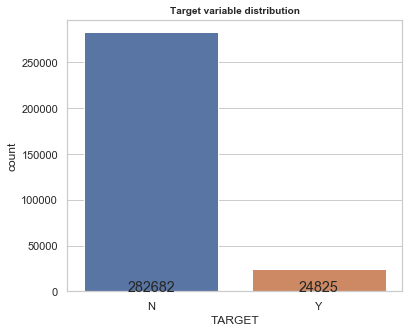

In [63]:
# count plot for above values:
plt.figure(figsize = (6,5))
sns.countplot(curr_attr.TARGET,order=curr_attr.TARGET.value_counts().index)
plt.title("Target variable distribution",fontsize = 10,weight = "bold")
x = list(curr_attr.TARGET.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
plt.show()


##### We see that our data is IMBALANCED and for our further analysis we can divide our data into 2 sub-data sets for each category of  TARGET variable.

From the given dataset, abbreviation for the clients with TARGET='Y' are defaulter and TARGET='N' are people who are repayer.

In [64]:
repayer = curr_attr[curr_attr.TARGET == "N"]
defaulter = curr_attr[curr_attr.TARGET == "Y"]

Defining a custom function for ploting above count plot for other variables as well:


In [65]:
def cnt_pie(var):
    
    plt.figure(figsize = (6,5))
    curr_attr[var].value_counts(normalize = True).plot.pie(
            autopct = "%1.0f%%",startangle = 60).set_title("%s Distirbution"%(var))
    plt.show()

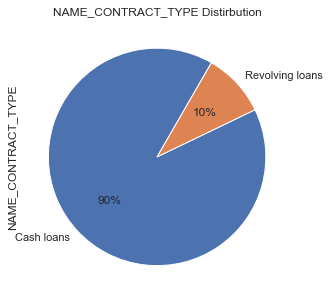

In [66]:
cnt_pie("NAME_CONTRACT_TYPE")

We can see that most customer opt for loan type as CASH and not REVOLVING type loan.

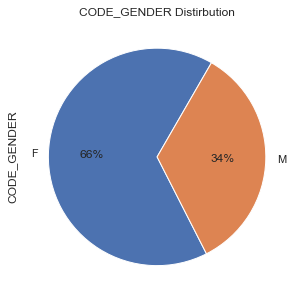

In [67]:
cnt_pie("CODE_GENDER")

We see that bank have more Females customers than Males.

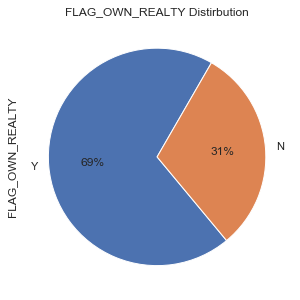

In [68]:
cnt_pie("FLAG_OWN_REALTY")

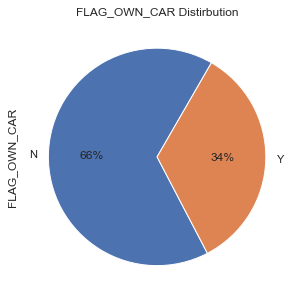

In [69]:
cnt_pie("FLAG_OWN_CAR")

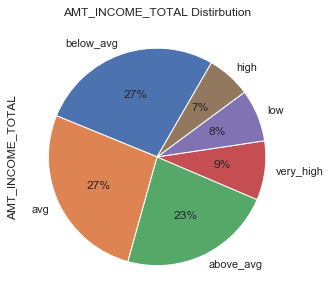

In [70]:
cnt_pie("AMT_INCOME_TOTAL")

From above we can see that most customer lie in category having Total Income in range : "AVGERAGE" or "ABOVE AVERAGE" i.e. between 1.25 lakhs to 2.25 lakhs

In [71]:
A = curr_attr[["AMT_INCOME_TOTAL", 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE']]

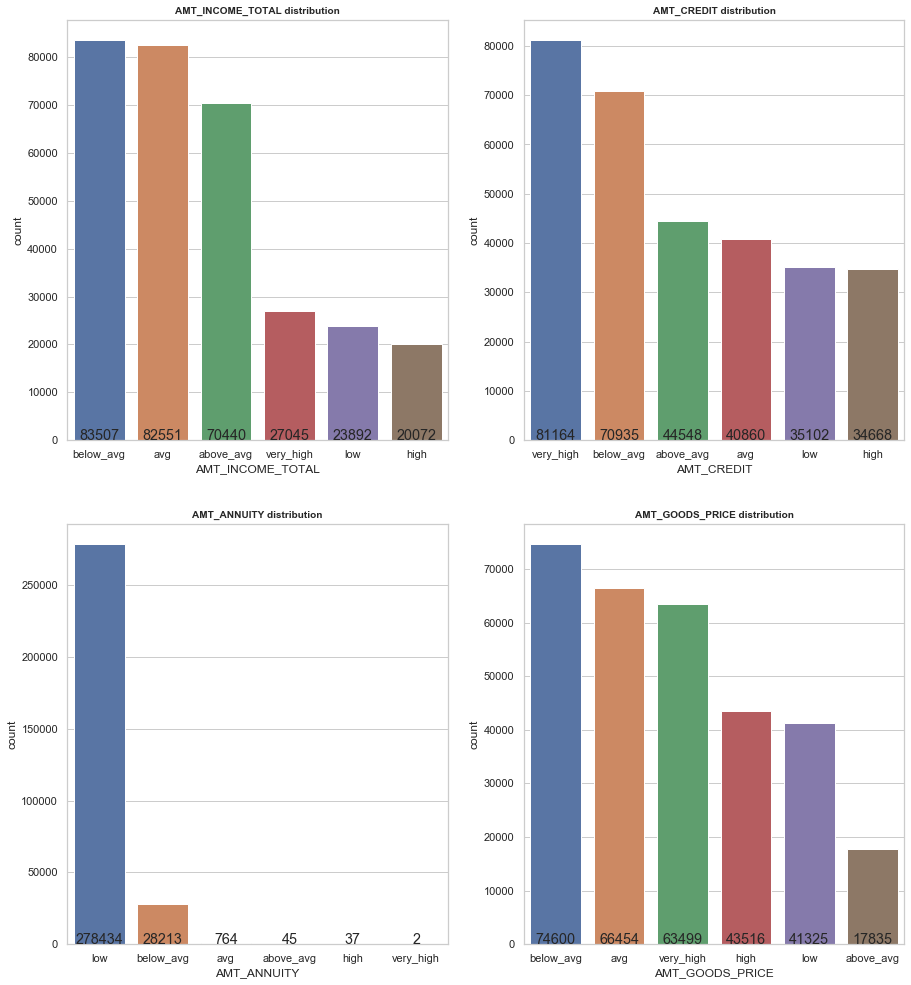

In [72]:
plt.figure(figsize = (15,17))
plt.subplot(221)
sns.countplot(curr_attr.AMT_INCOME_TOTAL,order=curr_attr.AMT_INCOME_TOTAL.value_counts().index)
plt.title("AMT_INCOME_TOTAL distribution",fontsize = 10,weight = "bold")
x = list(curr_attr.AMT_INCOME_TOTAL.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
    
plt.subplot(222)
sns.countplot(curr_attr.AMT_CREDIT,order=curr_attr.AMT_CREDIT.value_counts().index)
plt.title("AMT_CREDIT distribution",fontsize = 10,weight = "bold")
x = list(curr_attr.AMT_CREDIT.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
    
plt.subplot(223)
sns.countplot(curr_attr.AMT_ANNUITY,order=curr_attr.AMT_ANNUITY.value_counts().index)
plt.title("AMT_ANNUITY distribution",fontsize = 10,weight = "bold")
x = list(curr_attr.AMT_ANNUITY.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
    
plt.subplot(224)
sns.countplot(curr_attr.AMT_GOODS_PRICE,order=curr_attr.AMT_GOODS_PRICE.value_counts().index)
plt.title("AMT_GOODS_PRICE distribution",fontsize = 10,weight = "bold")
x = list(curr_attr.AMT_GOODS_PRICE.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
    
plt.show()

#### The above sub plots provide the distribution of various sorts of Amounts over the customer set.

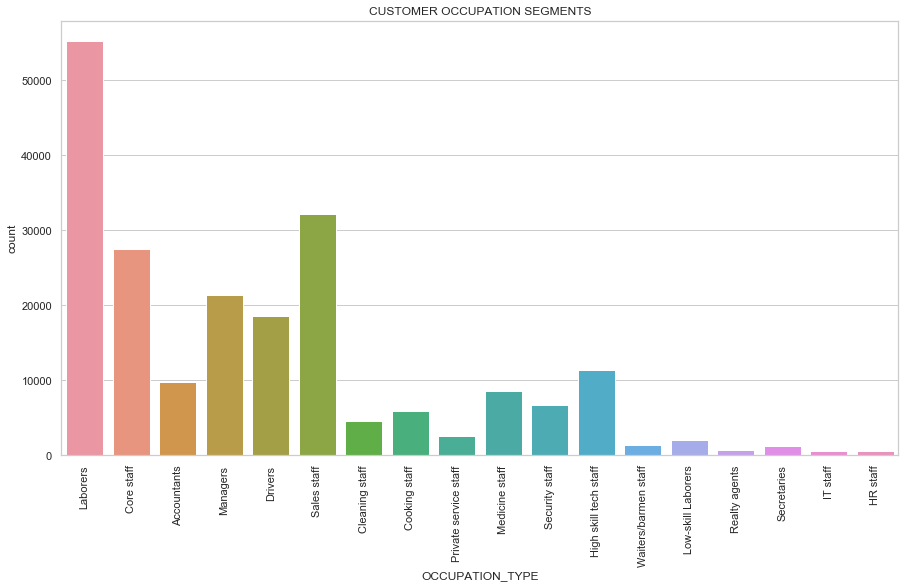

In [73]:
# OCCUPATION SEGMENTS of CUSTOMERS:

plt.figure(figsize = (15,8))
graph = sns.countplot(curr_attr.OCCUPATION_TYPE)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.title("CUSTOMER OCCUPATION SEGMENTS")
plt.show()

We can see that the LABORERS and SALES STAFF are the segments in which most customers work.

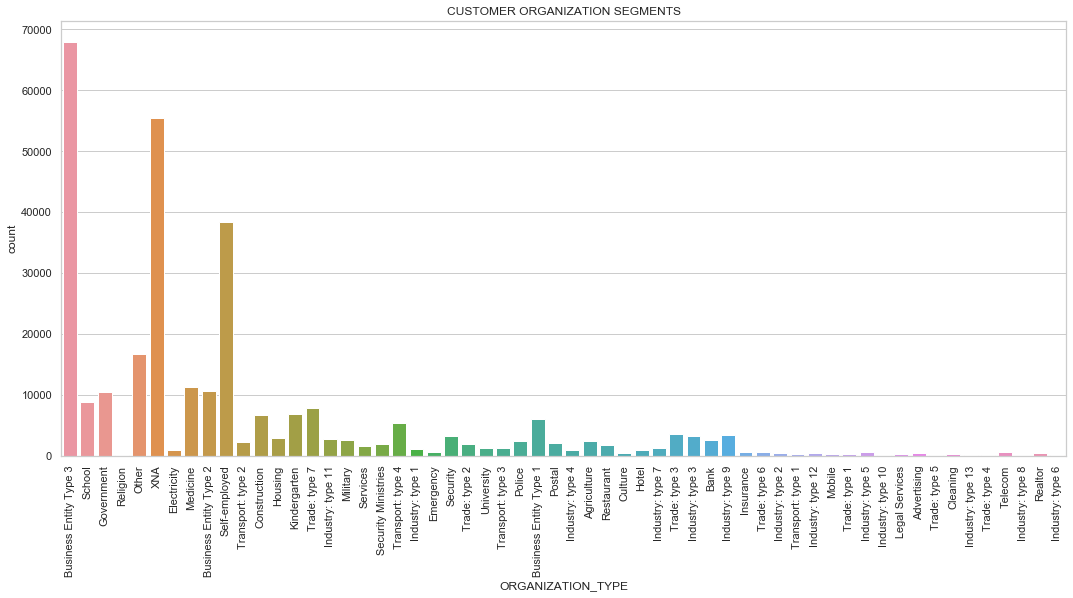

In [74]:
# ORGANIZATION SEGMENTS of CUSTOMERS:

plt.figure(figsize = (18,8))
graph = sns.countplot(curr_attr.ORGANIZATION_TYPE)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.title("CUSTOMER ORGANIZATION SEGMENTS")
plt.show()

Customers are mostly spread among the organization dealing with BUSINESS_ENTITY TYPE3 and SELF EMPLOYMENT.

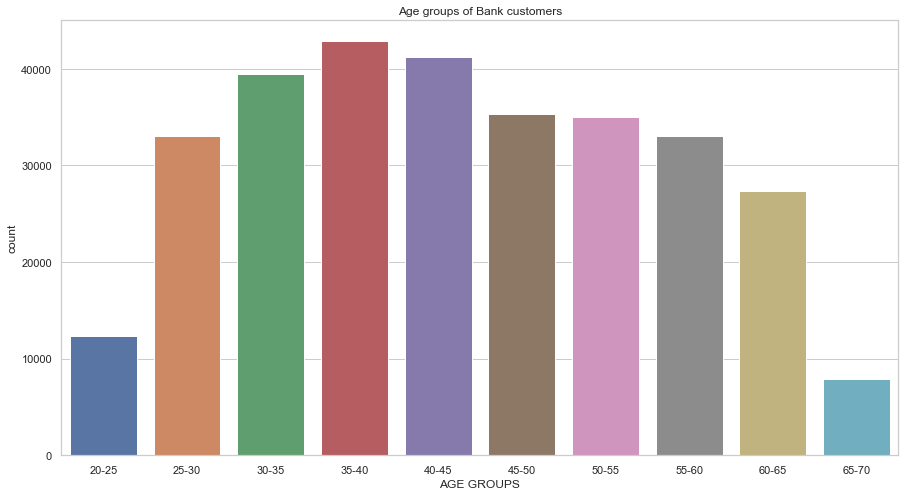

In [75]:
# AGE distribution
plt.figure(figsize = (15,8))
sns.countplot(curr_attr.AGE_GRP)
plt.title("Age groups of Bank customers")
plt.xlabel('AGE GROUPS')
plt.show()

We can see that the maximum customers belong to age group of 35-45 years(adults) and minimum having senior citizens under age group of 65-70.

### Univariate analysis w.r.t Target variables:

#### categorical variables:

We can define a CUSTOM plotting function with TARGET variable:

In [76]:
def univar(var):
    plt.figure(figsize = (16,7))
    plt.subplot(121)
    graph = sns.countplot(repayer[var],order=repayer[var].value_counts().index)
    graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    plt.title("distribution of Repayers over %s"%(var),fontsize = 10,weight = "bold")
    x = list(repayer[var].value_counts())
    for i, v in enumerate(x):
        plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
        
    plt.subplot(122)    
    graph = sns.countplot(defaulter[var],order=defaulter[var].value_counts().index)
    graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    plt.title("distribution of Defaulters over %s"%(var),fontsize = 10,weight = "bold")
    x = list(defaulter[var].value_counts())
    for i, v in enumerate(x):
        plt.text(i, v/x[i], x[i], fontsize='large', ha='center')
    plt.show()

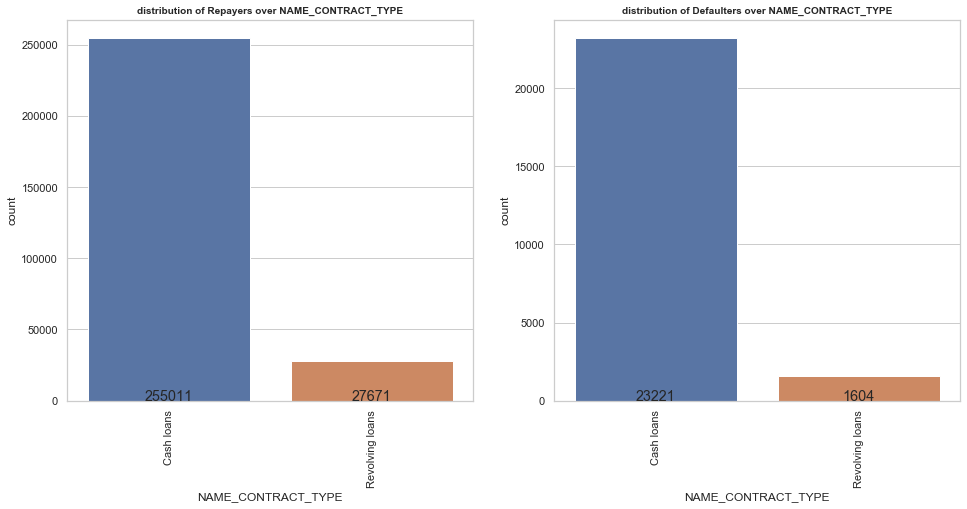

In [77]:
# Contract Type vs TARGET:
univar("NAME_CONTRACT_TYPE")

for both rapayer and defaulters count for people who are applying for cash loans is high as compared to rev loans, so we cannot infer anything from this.

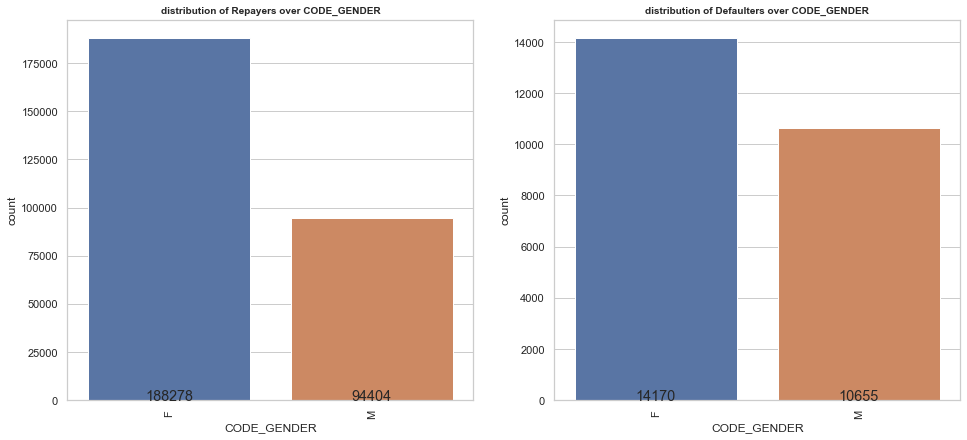

In [78]:
# GENDER Distribution
univar("CODE_GENDER")

Here, we can depict that for repayers male population is approx half of female population
wherein for defaulters its not in much difference.

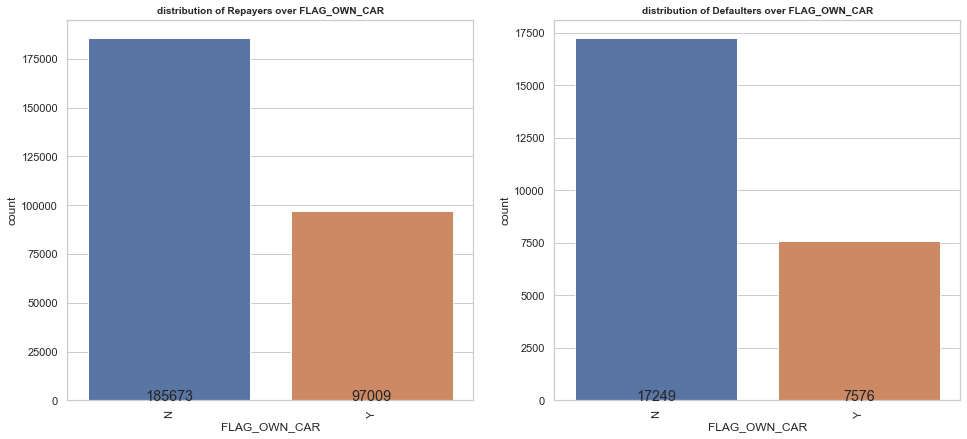

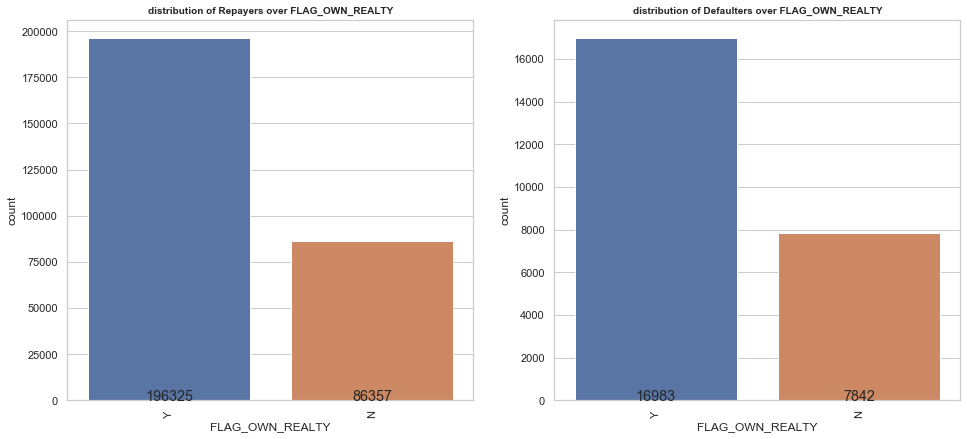

In [79]:
## ASSET owned by repayer and defaulters:
univar("FLAG_OWN_CAR")
univar("FLAG_OWN_REALTY")

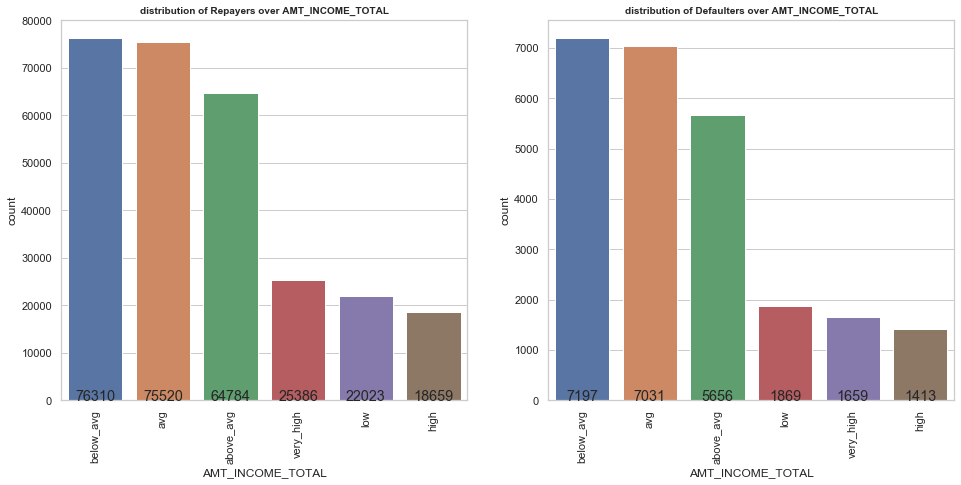

In [80]:
# TOTAL income in both segments:
univar("AMT_INCOME_TOTAL")

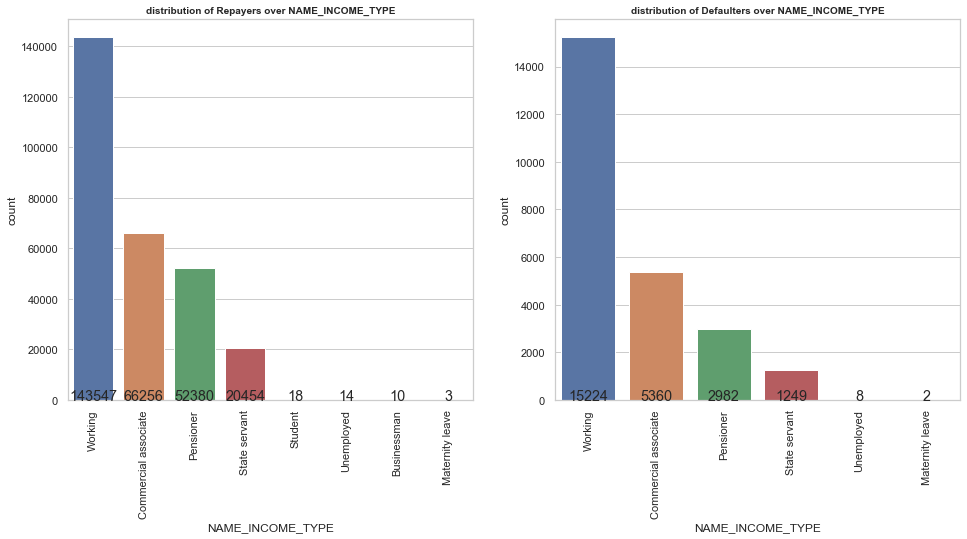

In [81]:
# Working condition of Repayers/Defaulters:
univar("NAME_INCOME_TYPE")

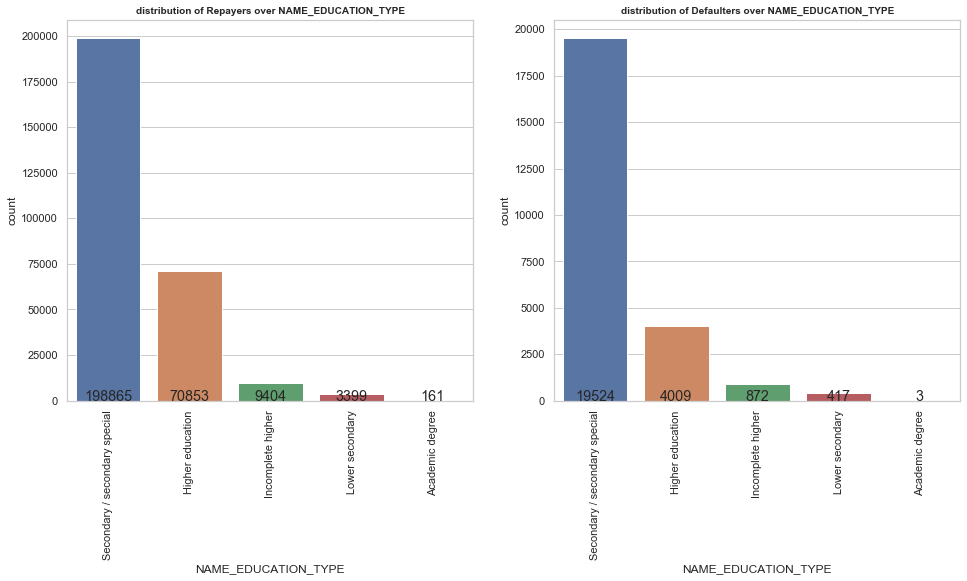

In [82]:
# EDUCATION TYPE of Repayers/Defaulters:
univar("NAME_EDUCATION_TYPE")

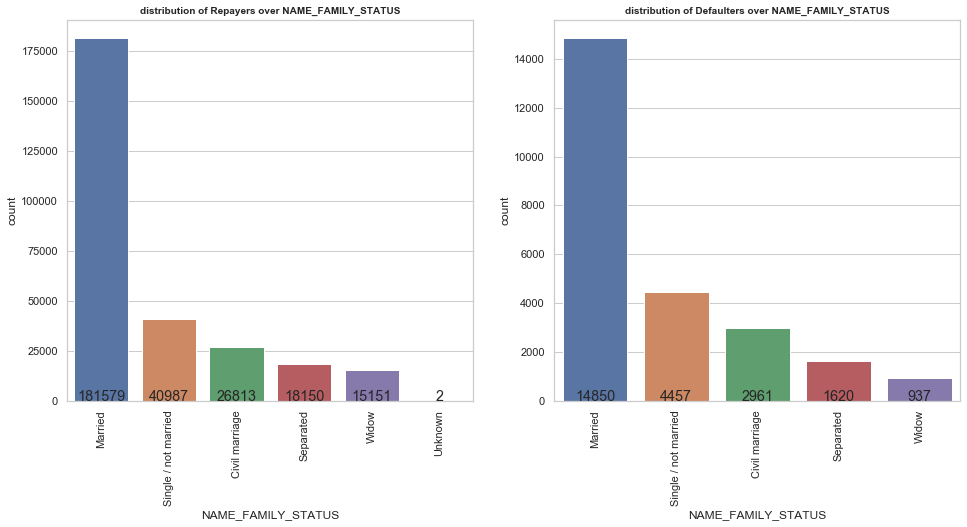

In [83]:
#Family status in both segments:
univar("NAME_FAMILY_STATUS")

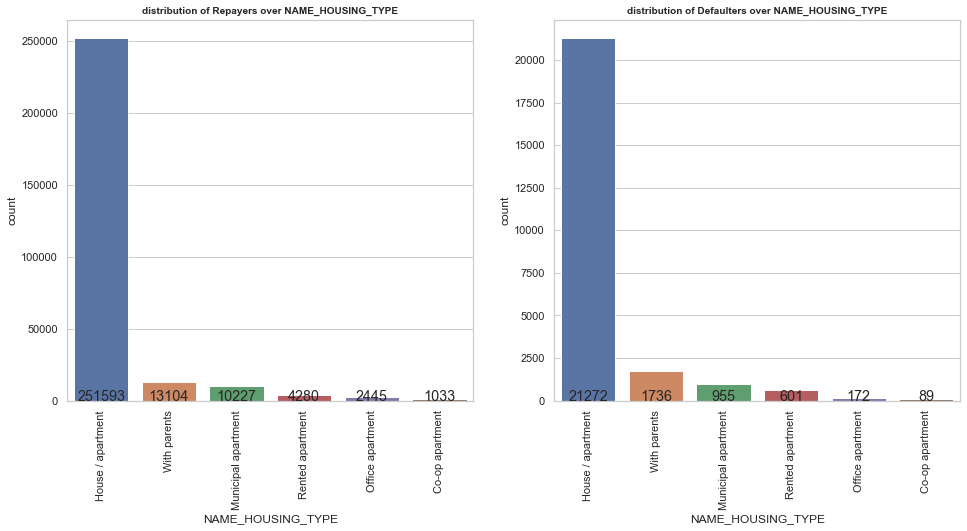

In [84]:
# Housing condition of repayers/defaulters:
univar("NAME_HOUSING_TYPE")

From above plots we got an idea which kind of customer segment is most likely to be in the defaulter category.

#### Numerical Variables:


In [85]:
curr_attr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,AGE_YEAR,AGE_GRP
0,100002,Y,Cash loans,M,N,Y,above_avg,avg,low,avg,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.000000,medium,medium,N,N,N,Business Entity Type 3,0.262949,0.139376,10,WEDNESDAY,25.900000,25-30
1,100003,N,Cash loans,F,N,N,high,very_high,low,very_high,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.000000,high,high,N,N,N,School,0.622246,nan,11,MONDAY,45.900000,45-50
2,100004,N,Revolving loans,M,Y,Y,low,low,low,low,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.000000,medium,medium,N,N,N,Government,0.555912,0.729567,9,MONDAY,52.200000,50-55
3,100006,N,Cash loans,F,N,Y,avg,below_avg,low,below_avg,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.000000,medium,medium,N,N,N,Business Entity Type 3,0.650442,nan,17,WEDNESDAY,52.100000,50-55
4,100007,N,Cash loans,M,N,Y,below_avg,above_avg,low,above_avg,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.000000,medium,medium,N,Y,Y,Religion,0.322738,nan,11,THURSDAY,54.600000,50-55


In [86]:
# boxplot distribution for family member in both segments:

def plot_num(a):
    
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5), sharey=True)
    plt.subplots_adjust(wspace=0.4)
    
    a1 = (a.replace('_',' ')).title()
    
    f1 = sns.boxplot(y=repayer[a], ax=ax1, color='coral', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax1.set_title('''Distribution of %s \n for Defaulters''' %(a1.upper()), fontsize=12, weight='bold')
    ax1.set_xlabel(a1)
    
    f2 = sns.boxplot(y=defaulter[a], ax=ax2, color='mediumseagreen', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax2.set_title('''Distribution of %s \n for Repayers''' %(a1.upper()), fontsize=12, weight='bold')
    ax2.set_xlabel(a1)
    
    plt.show()

#### CNT_FAM_MEMBERS

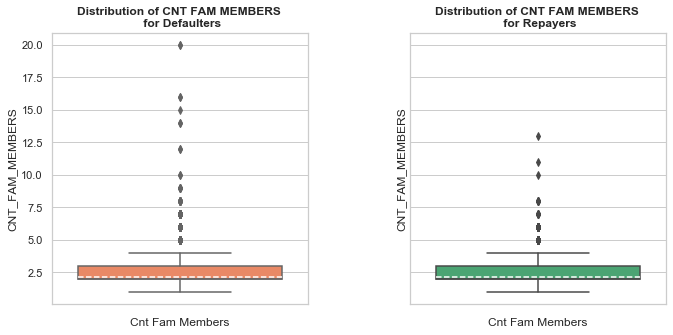

In [87]:
plot_num('CNT_FAM_MEMBERS')

#### EXT_SOURCE_2

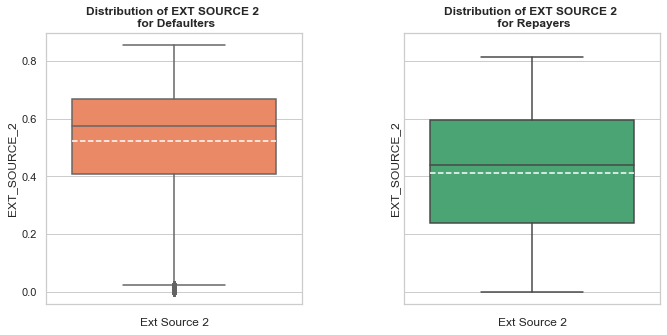

In [88]:
# external sources distribution for repayers and defaulters:

plot_num('EXT_SOURCE_2')

Average value for external source:2 is higher in Repayer segment.

#### AGE_YEAR

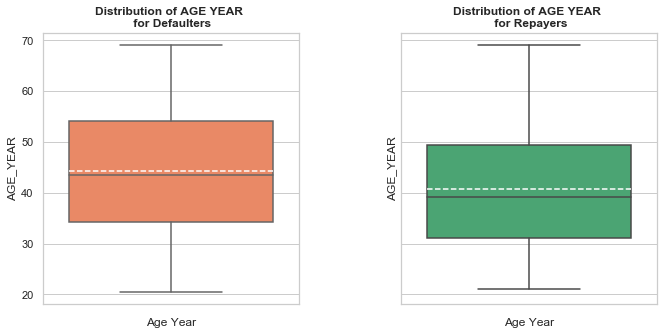

In [89]:
# Age distribution for repayers and defaulters:

plot_num('AGE_YEAR')

From above plot we can infer that Average age group for repayers is around 45 yrs and for defaulters is around 40 yrs.

### Bivariate analysis of numerical variables

#### Numerical - Numerical

In [90]:
# Defining function to get top n correlated variables from the dataset
def correlation2(df1, df2, n = 0):
    df1_corr = df1.corr()
    df1_corr = df1_corr.where(np.triu(np.ones(df1_corr.shape), k=1).astype(np.bool))
    corr_1 = df1_corr.unstack().reset_index()
    corr_1.columns  = ['VAR1_1', 'VAR2_1', 'Correlation_1']
    corr_1 = corr_1.dropna(subset = ['Correlation_1'])
    corr_1.Correlation_1 = abs(corr_1.Correlation_1)
    corr_1 = corr_1.sort_values(by='Correlation_1', ascending=False)
    
    df2_corr = df2.corr()
    df2_corr = df2_corr.where(np.triu(np.ones(df2_corr.shape), k=1).astype(np.bool))
    corr_2 = df2_corr.unstack().reset_index()
    corr_2.columns  = ['VAR1_2', 'VAR2_2', 'Correlation_2']
    corr_2 = corr_2.dropna(subset = ['Correlation_2'])
    corr_2.Correlation_2 = abs(corr_2.Correlation_2)
    corr_2 = corr_2.sort_values(by='Correlation_2', ascending=False)
    
    corr = pd.concat([corr_1,corr_2],axis=1).sort_values(by='Correlation_1', ascending=False)
    
    if n == 0:
        return corr.style.set_caption('Correlation between variables of df1 and df2')\
    .background_gradient(cmap='Greens',subset=['Correlation_1','Correlation_2'])\
    .format('{:.3f}',subset=['Correlation_1','Correlation_2'])
    elif n > 0:
        return corr[:n].style.set_caption('Correlation between variables of df1 and df2')\
    .background_gradient(cmap='Greens',subset=['Correlation_1','Correlation_2'])\
    .format('{:.3f}',subset=['Correlation_1','Correlation_2'])

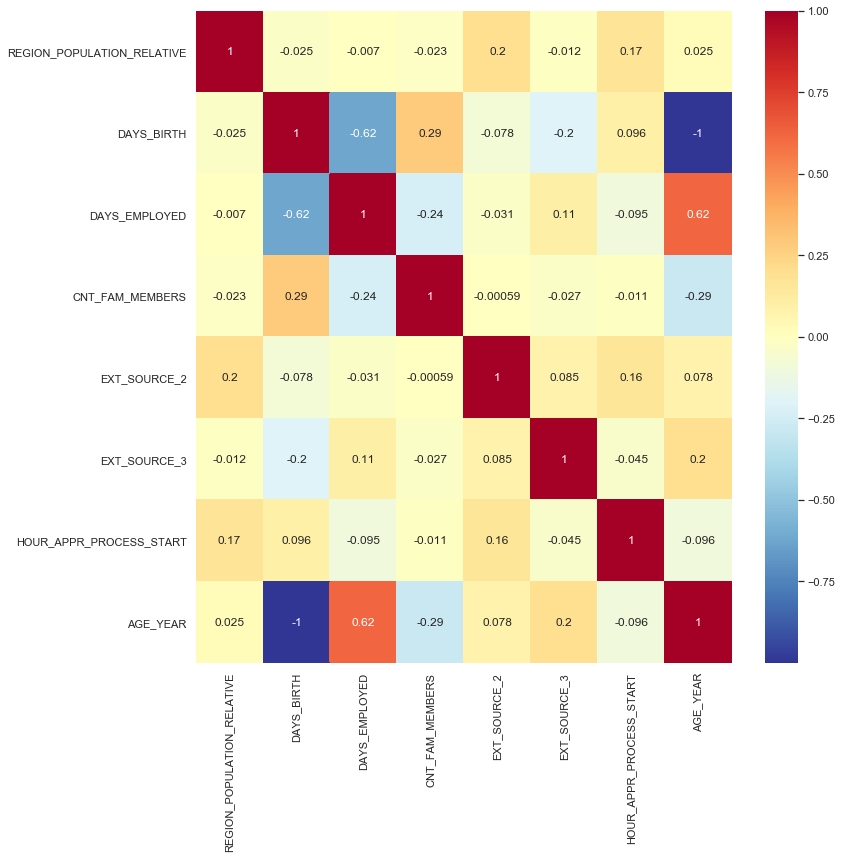

In [91]:
# Plotting the correlation heatmap for defaulters data
plt.figure(figsize=(12,12))
repayer_corr = repayer.iloc[:,1:].corr()
sns.heatmap(repayer_corr, annot=True, cmap='RdYlBu_r')
plt.show()

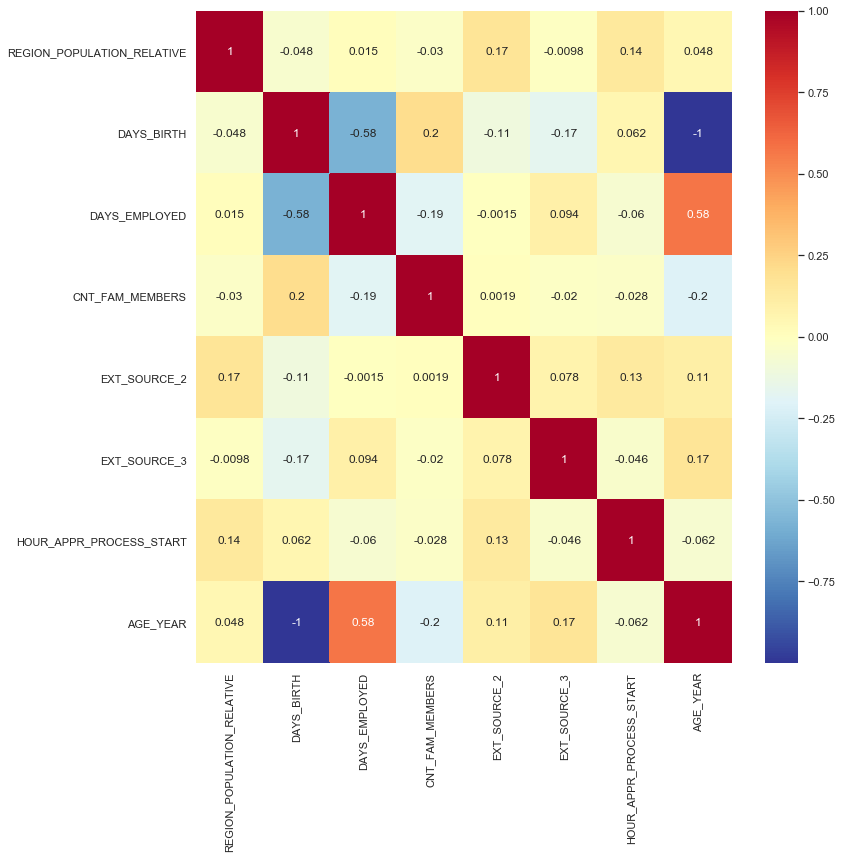

In [92]:
# Plotting the correlation heatmap for non-defaulters data
plt.figure(figsize=(12,12))
defaulter_corr = defaulter.iloc[:,1:].corr()
sns.heatmap(defaulter_corr, annot=True, cmap='RdYlBu_r')
plt.show()

#### Top 10 correlation of def_data and nondef_data

In [93]:
correlation2(repayer, defaulter, 10)

,VAR1_1,VAR2_1,Correlation_1,VAR1_2,VAR2_2,Correlation_2
74,AGE_YEAR,DAYS_BIRTH,1.000,AGE_YEAR,DAYS_BIRTH,1.000
29,DAYS_EMPLOYED,DAYS_BIRTH,0.618,DAYS_EMPLOYED,DAYS_BIRTH,0.575
75,AGE_YEAR,DAYS_EMPLOYED,0.618,AGE_YEAR,DAYS_EMPLOYED,0.575
76,AGE_YEAR,CNT_FAM_MEMBERS,0.286,AGE_YEAR,CNT_FAM_MEMBERS,0.203
38,CNT_FAM_MEMBERS,DAYS_BIRTH,0.286,CNT_FAM_MEMBERS,DAYS_BIRTH,0.203
39,CNT_FAM_MEMBERS,DAYS_EMPLOYED,0.237,CNT_FAM_MEMBERS,DAYS_EMPLOYED,0.187
46,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.198,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.170
56,EXT_SOURCE_3,DAYS_BIRTH,0.197,EXT_SOURCE_3,DAYS_BIRTH,0.172
78,AGE_YEAR,EXT_SOURCE_3,0.197,AGE_YEAR,EXT_SOURCE_3,0.172
64,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.173,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.143


**From the Correlation matrix, we can infer that the variables AMT_GOODS_PROCE and AMT_CREDIT have highest correlation between them for both repayer and defaulter case.** Though, the YEARS_BIRTH and DAYS_BIRTH have highest correlation we are not considering them as they are mutually dependent variables.


#### Categorical - Numerical

In [94]:
# Considering dataframe with Int data types and subsetting w.r.t. Target variables:
curr_num_re = curr_num[(curr_num.TARGET == "Y")]
curr_num_def = curr_num[(curr_num.TARGET == "N")]

In [95]:
#Capping outliers for bivariate analysis i.e. removing values above 99 percentile
curr_num_re = curr_num_re[(curr_num_re.AMT_INCOME_TOTAL < curr_num_re.AMT_INCOME_TOTAL.quantile(0.99))]

curr_num_def = curr_num_def[(curr_num_def.AMT_INCOME_TOTAL < curr_num_def.AMT_INCOME_TOTAL.quantile(0.99))]

curr_num_re = curr_num_re[(curr_num_re.AMT_CREDIT < curr_num_re.AMT_CREDIT.quantile(0.99))]

curr_num_def = curr_num_def[(curr_num_def.AMT_CREDIT < curr_num_def.AMT_CREDIT.quantile(0.99))]

curr_num_re = curr_num_re[(curr_num_re.AMT_ANNUITY < curr_num_re.AMT_ANNUITY.quantile(0.99))]

curr_num_def = curr_num_def[(curr_num_def.AMT_ANNUITY < curr_num_def.AMT_ANNUITY.quantile(0.99))]

curr_num_re = curr_num_re[(curr_num_re.AMT_GOODS_PRICE < curr_num_re.AMT_GOODS_PRICE.quantile(0.99))]

curr_num_def = curr_num_def[(curr_num_def.AMT_GOODS_PRICE < curr_num_def.AMT_GOODS_PRICE.quantile(0.99))]

In [96]:
def plot_catnum(a,b,label_rotation=False):
    
    f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,5), sharey=True)
    plt.subplots_adjust(wspace=0.4)
    
    a1 = (a.replace('_',' ')).title()
    b1 = (b.replace('_',' ')).title()
    
    f1 = sns.boxplot(x=curr_num_re[a], y=curr_num_re[b], ax=ax1,
                     color='coral', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax1.set_title('''Distribution of %s and \n %s for Repayer''' %(a1.upper(),b1.upper()), fontsize=12, weight='bold')
    ax1.set_xlabel(a1)
    
    f2 = sns.boxplot(x=curr_num_def[a], y=curr_num_def[b], ax=ax2,
                     color='mediumseagreen', showmeans=True, meanline=True,  
                     meanprops=dict(linestyle='--', linewidth=1.5, color='w'))
    ax2.set_title('''Distribution of %s and \n %s for Defaulter''' %(a1.upper(),b1.upper()), fontsize=12, weight='bold')
    ax2.set_xlabel(a1)
    
    if label_rotation:
        f1.set_xticklabels(f1.get_xticklabels(), rotation=90)
        f2.set_xticklabels(f2.get_xticklabels(), rotation=90)
    
    plt.show()

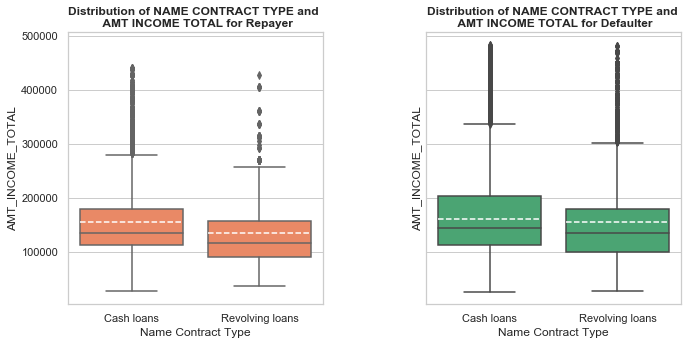

In [97]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL')

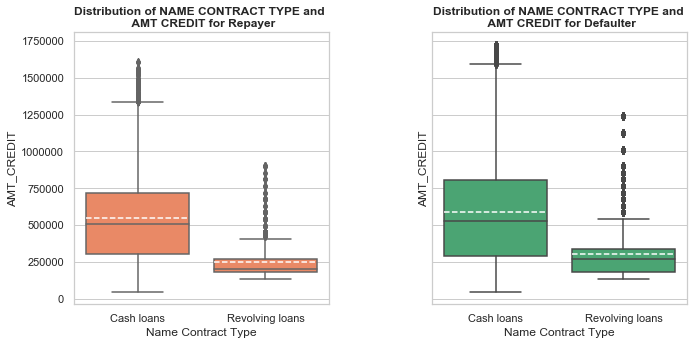

In [98]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_CREDIT')

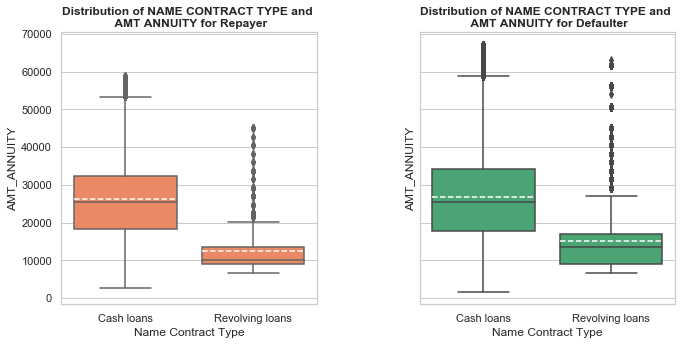

In [99]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_ANNUITY')

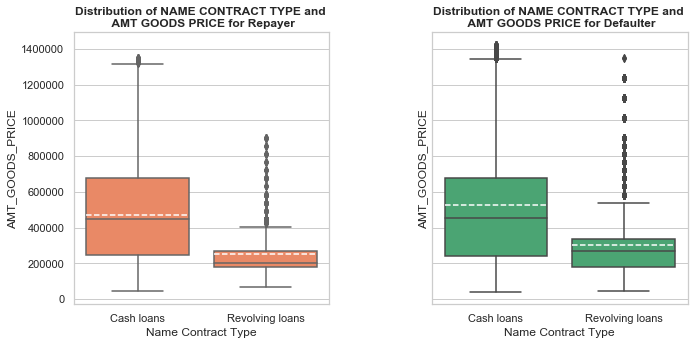

In [100]:
plot_catnum('NAME_CONTRACT_TYPE','AMT_GOODS_PRICE')

From above Bi-variate plots with respect between different amount types and contract type we can see that the spread is more for "CASH LOANS" rather than that for "Revolving loans" except in the case for AMOUNT_INCOME_TOTAL.

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of previous application data:

In [101]:
pre_app = pd.read_csv('previous_application.csv', na_values = ["XNA","XAP"],keep_default_na = True)  #Creating pre_app dataframe from external csv file.

pre_app.head()      # Printing top 5 rows.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,NaN,Approved,-73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,Y,1,nan,nan,nan,NaN,Approved,-164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,Y,1,nan,nan,nan,NaN,Approved,-301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,Y,1,nan,nan,nan,NaN,Approved,-512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [102]:
# dimension check

pre_app.shape    # Returns tuple of shape (Rows, columns) of dataframe


(1670214, 37)

In [103]:
# dimension check

print("Shape of previous application dataset: %d x %d" %(pre_app.shape[0],pre_app.shape[1]))

Shape of previous application dataset: 1670214 x 37


In [104]:
# Finding the description of columns in the dataset

pre_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [105]:
#  Finding the data types of variables present in the dataset.

pre_app.dtypes.value_counts()   # Returns us the count of occurences of each of the unique values in this column.

object     16
float64    15
int64       6
dtype: int64

In [106]:
#  Finding the distribution of numerical variables.

pre_app.describe()     # Returns some basic statistical details.

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.000000,1670214.000000,1297979.000000,1670214.000000,1670213.000000,774370.000000,1284699.000000,1670214.000000,1670214.000000,774370.000000,5951.000000,5951.000000,1670214.000000,1670214.000000,1297984.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1923089.135331,278357.174099,15955.120659,175233.860360,196114.021218,6697.402139,227847.279283,12.484182,0.996468,0.079637,0.188357,0.773503,-880.679668,313.951115,16.054082,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,532597.958696,102814.823849,14782.137335,292779.762387,318574.616546,20921.495410,315396.557937,3.334028,0.059330,0.107823,0.087671,0.100879,779.099667,7127.443459,14.567288,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1000001.000000,100001.000000,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,-0.000015,0.034781,0.373150,-2922.000000,-1.000000,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1461857.250000,189329.000000,6321.780000,18720.000000,24160.500000,0.000000,50841.000000,10.000000,1.000000,0.000000,0.160716,0.715645,-1300.000000,-1.000000,6.000000,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1923110.500000,278714.500000,11250.000000,71046.000000,80541.000000,1638.000000,112320.000000,12.000000,1.000000,0.051605,0.189122,0.835095,-581.000000,3.000000,12.000000,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2384279.750000,367514.000000,20658.420000,180360.000000,216418.500000,7740.000000,234000.000000,15.000000,1.000000,0.108909,0.193330,0.852537,-280.000000,82.000000,24.000000,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2845382.000000,456255.000000,418058.145000,6905160.000000,6905160.000000,3060045.000000,6905160.000000,23.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,4000000.000000,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [107]:
## Unique values in each columns of data set

pre_app.agg("nunique")    # returns series with number of distinct observations over column axis.

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   3
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              23
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    3
CODE_REJECT_REASON                   7
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     3
NAME_GOODS_CATEGORY                 27
NAME_PORTFOLIO                       4
NAME_PRODUCT_TYPE                    2
CHANNEL_TYPE             

In [108]:
# Checking null values in columns of each dataset:

pre_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE         1600579
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON             1358337
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE             

In [109]:
# Calling function which returns null values and percentage null:

pre_app_null = null_count(pre_app)
pre_app_null.sort_values(by = "Percentage_Null",ascending = False)

,Null,Percentage_Null
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_INTEREST_PRIVILEGED,1664263,99.643698
NAME_CASH_LOAN_PURPOSE,1600579,95.830774
CODE_REJECT_REASON,1358337,81.327123
NAME_PRODUCT_TYPE,1063666,63.684414
NAME_GOODS_CATEGORY,950809,56.927376
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_SELLER_INDUSTRY,855720,51.234153
NAME_TYPE_SUITE,820405,49.119754


From above null value percentage , lets select column havin null value percentage  < 40% .

In [110]:
# Displaying columns with less than 40% null values

L3 = list(pre_app_null[(pre_app_null.Percentage_Null <40 )].index)
pre_attr = pre_app[L3]
pre_attr.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,SATURDAY,15,Y,1,Approved,-73,Cash through the bank,Repeater,POS,Country-wide,35,12.000000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,THURSDAY,11,Y,1,Approved,-164,NaN,Repeater,Cash,Contact center,-1,36.000000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,112500.000000,TUESDAY,11,Y,1,Approved,-301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.000000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,450000.000000,MONDAY,7,Y,1,Approved,-512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.000000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,337500.000000,THURSDAY,9,Y,1,Refused,-781,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.000000,high,Cash Street: high


In [111]:
# Dimension Check

pre_attr.shape  # Returns tuple of shape (Rows, columns) of dataframe

(1670214, 21)

### Univariate Analysis

In [112]:
# Percentage of applications based on their contract status

pre_app.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved       62.074740
Canceled       18.938831
Refused        17.403638
Unused offer    1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

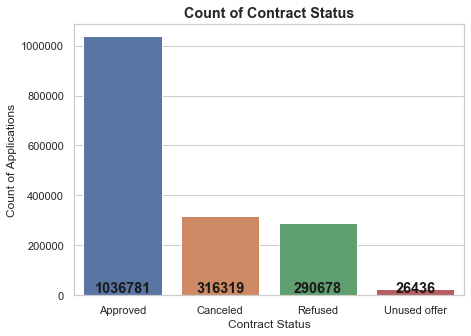

In [113]:
plt.figure(figsize=(7,5))
sns.countplot(pre_app['NAME_CONTRACT_STATUS'], order=pre_app.NAME_CONTRACT_STATUS.value_counts().index)
plt.title('Count of Contract Status', fontsize='large', weight='bold')
plt.xlabel('Contract Status')
plt.ylabel('Count of Applications')
x = list(pre_app.NAME_CONTRACT_STATUS.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center', va='bottom', weight='bold', color='k')
plt.show()

In [114]:
# Dividing the dataframes based on their contract status
approved = pre_app.loc[pre_app.NAME_CONTRACT_STATUS == 'Approved',:]
canceled = pre_app.loc[pre_app.NAME_CONTRACT_STATUS == 'Canceled',:]
refused = pre_app.loc[pre_app.NAME_CONTRACT_STATUS == 'Refused',:]
unused = pre_app.loc[pre_app.NAME_CONTRACT_STATUS == 'Unused offer',:]

In [115]:
def plot_cat(a, label_rotation=False):
    
    f, axs = plt.subplots(2,2, figsize=(15,15), sharex=label_rotation)
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.2)
    
    a1 = (a.replace('_',' ')).title()
    
    f1 = sns.countplot(approved[a], ax=axs[0, 0], order = pre_app[a].value_counts().index)
    axs[0, 0].set_title('''Count of %s \n for Approved applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[0, 0].set_xlabel(a1)
    axs[0, 0].set_ylabel('Count of applications')
    
    f2 = sns.countplot(canceled[a], ax=axs[0, 1], order = pre_app[a].value_counts().index)
    axs[0, 1].set_title('''Count of %s \n for Canceled applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[0, 1].set_xlabel(a1)
    axs[0, 1].set_ylabel('Count of applications')
    
    f3 = sns.countplot(refused[a], ax=axs[1, 0], order = pre_app[a].value_counts().index)
    axs[1, 0].set_title('''Count of %s \n for Refused applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[1, 0].set_xlabel(a1)
    axs[1, 0].set_ylabel('Count of applications')
    
    f4 = sns.countplot(unused[a], ax=axs[1, 1], order = pre_app[a].value_counts().index)
    axs[1, 1].set_title('''Count of %s \n for Unused applications''' %(a1.upper()), fontsize=12, weight='bold')
    axs[1, 1].set_xlabel(a1)
    axs[1, 1].set_ylabel('Count of applications')
    
    if label_rotation:
        f1.set_xticklabels(f1.get_xticklabels(), rotation=90)
        f2.set_xticklabels(f2.get_xticklabels(), rotation=90)
        f3.set_xticklabels(f3.get_xticklabels(), rotation=90)
        f4.set_xticklabels(f4.get_xticklabels(), rotation=90)
    
    plt.show()

#### NAME_YIELD_GROUP

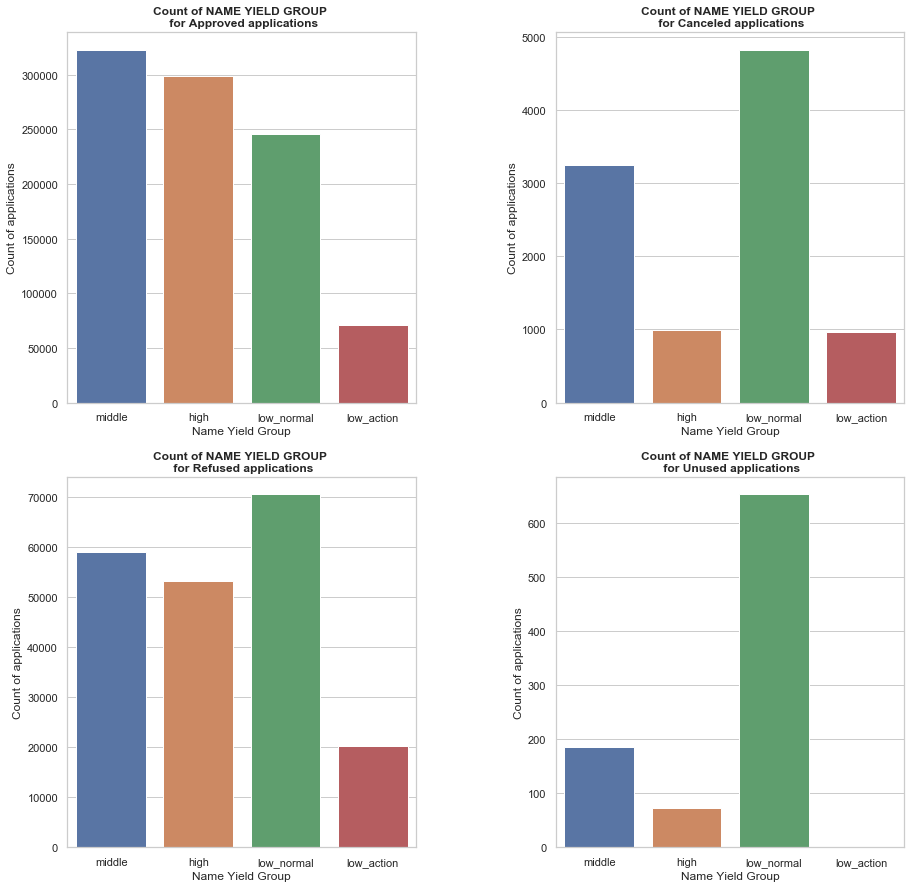

In [116]:
plot_cat('NAME_YIELD_GROUP')

- Majority of the approved loans are from Middle Yield Group.
- Majority of the refused, canceled and unused loans are from Low Normal Yield Group.

**Chances of getting loans approved is higher middle and high income yield groups.**

#### PRODUCT_COMBINATION

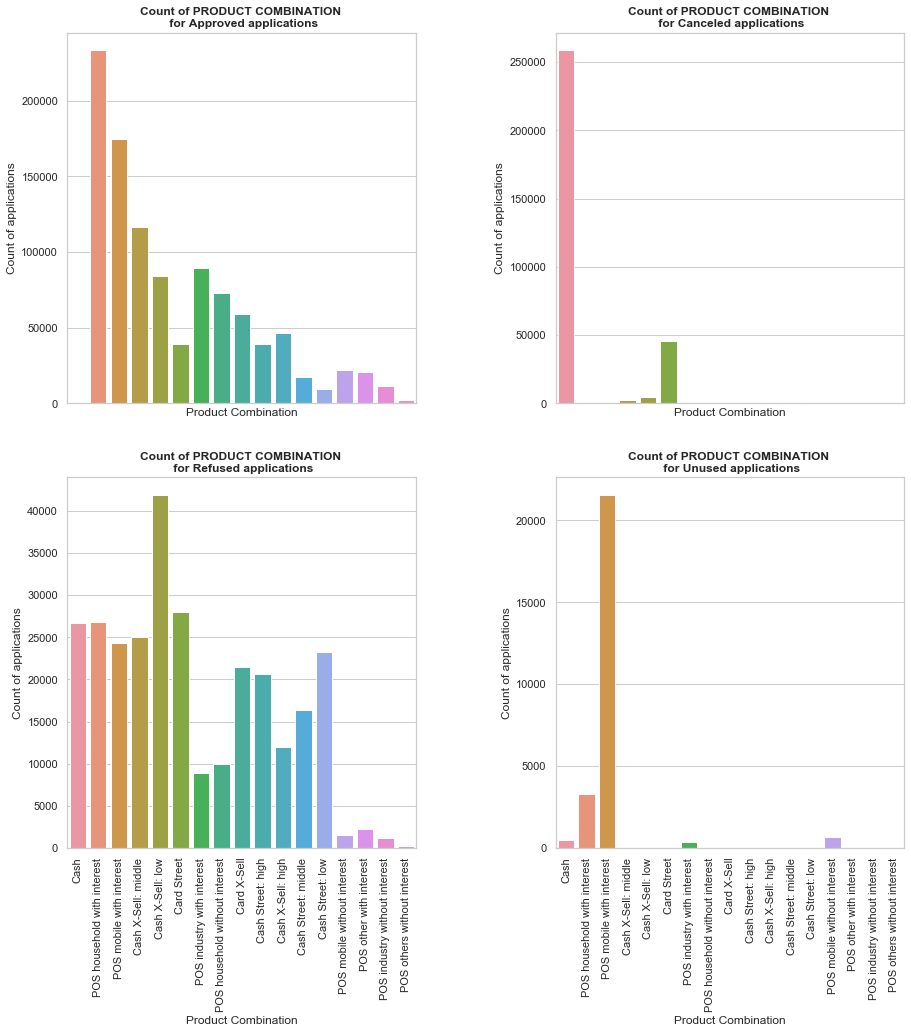

In [117]:
plot_cat('PRODUCT_COMBINATION', True)

- Nearly all the cash type applications doesn't get approved.
- POS househould with interest constitutes the highest approval.

#### NAME_PORTFOLIO

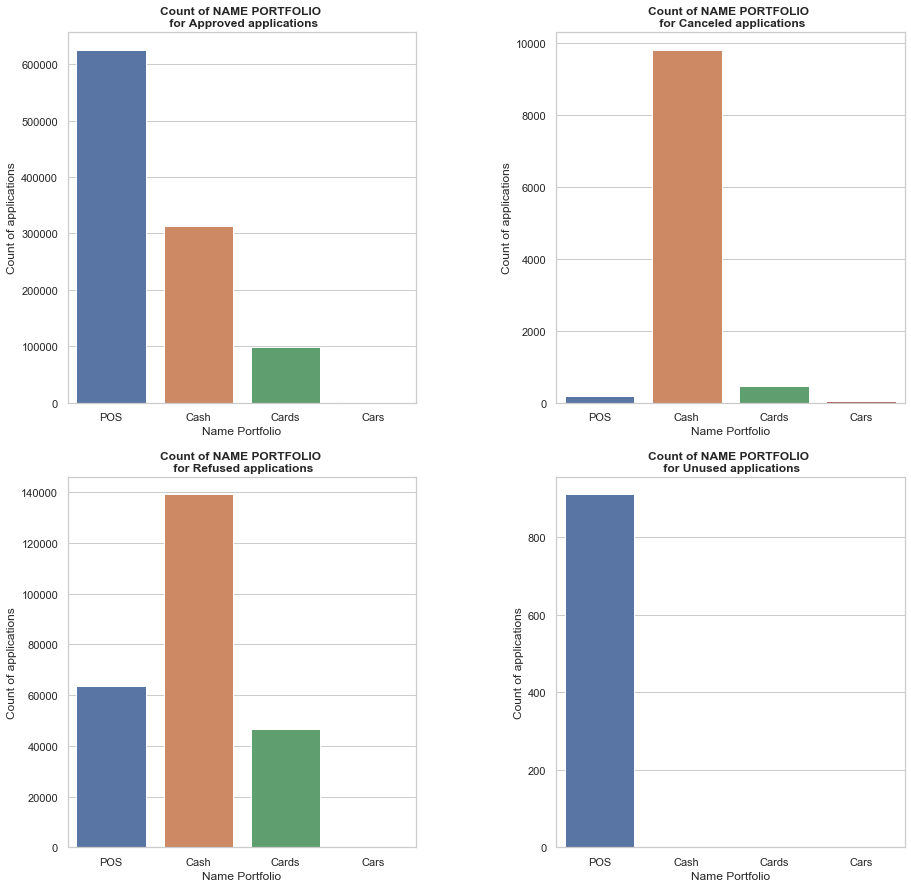

In [118]:
plot_cat('NAME_PORTFOLIO')

- Cash constitutes majority of the cancelled and refused applications.
- POS loans has the highest rate of approval.

#### NAME_CLIENT_TYPE

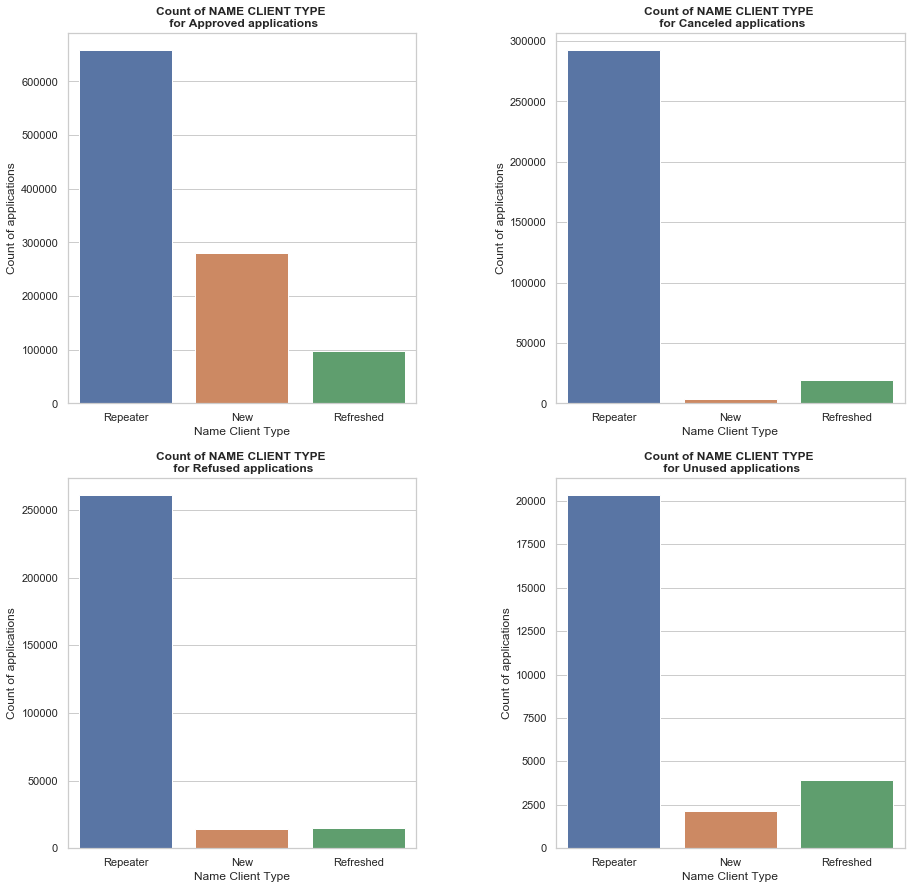

In [119]:
plot_cat('NAME_CLIENT_TYPE')

From the above plot, we can see that the chances of new application getting approved is higher than that of the other types.

#### NAME_CONTRACT_TYPE

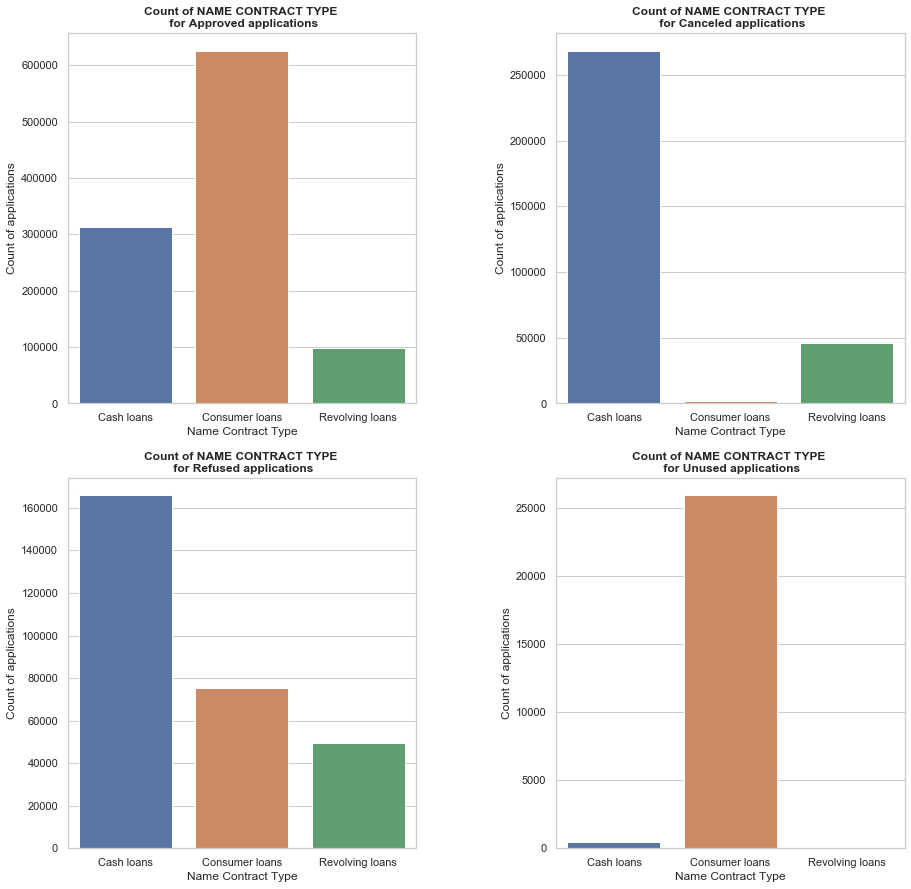

In [120]:
plot_cat('NAME_CONTRACT_TYPE')

- Consumer loans constitutes the majority of approved loan applications.
- Cash loans constitutes the majority of refused and cancelled loan applicatons.

#### Merging previous and current application data based on SK_ID_CURR:

In [121]:
result = pd.merge(pre_attr,curr_attr,on = "SK_ID_CURR")

result.head()   # Printing top 5 rows.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_y,WEEKDAY_APPR_PROCESS_START_y,AGE_YEAR,AGE_GRP
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,SATURDAY,15,Y,1,Approved,-73,Cash through the bank,Repeater,POS,Country-wide,35,12.000000,middle,POS mobile with interest,N,Cash loans,F,N,Y,above_avg,above_avg,low,avg,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443,-7392,NaN,3.000000,high,high,N,N,N,Military,0.683797,nan,17,TUESDAY,39.600000,35-40
1,1696966,271877,Consumer loans,68258.655000,1800000.000000,1754721.000000,1800000.000000,SATURDAY,18,Y,1,Refused,-472,Cash through the bank,Repeater,POS,Regional / Local,55,36.000000,low_normal,POS industry with interest,N,Cash loans,F,N,Y,above_avg,above_avg,low,avg,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443,-7392,NaN,3.000000,high,high,N,N,N,Military,0.683797,nan,17,TUESDAY,39.600000,35-40
2,2154916,271877,Consumer loans,12417.390000,108400.500000,119848.500000,108400.500000,SUNDAY,14,Y,1,Approved,-548,Cash through the bank,New,POS,Stone,196,12.000000,middle,POS industry with interest,N,Cash loans,F,N,Y,above_avg,above_avg,low,avg,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443,-7392,NaN,3.000000,high,high,N,N,N,Military,0.683797,nan,17,TUESDAY,39.600000,35-40
3,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,THURSDAY,11,Y,1,Approved,-164,NaN,Repeater,Cash,Contact center,-1,36.000000,low_action,Cash X-Sell: low,N,Revolving loans,F,N,N,below_avg,low,low,low,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-21335,-1255,Private service staff,2.000000,medium,medium,N,N,N,Self-employed,0.663524,nan,10,SUNDAY,58.500000,55-60
4,1536272,108129,Cash loans,21709.125000,450000.000000,512370.000000,450000.000000,WEDNESDAY,9,Y,1,Approved,-515,NaN,Repeater,Cash,AP+ (Cash loan),6,36.000000,low_normal,Cash X-Sell: low,N,Revolving loans,F,N,N,below_avg,low,low,low,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-21335,-1255,Private service staff,2.000000,medium,medium,N,N,N,Self-employed,0.663524,nan,10,SUNDAY,58.500000,55-60


In [122]:
# Finding the description of columns in the dataset

result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 51 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_PREV                    1413646 non-null  int64   
 1   SK_ID_CURR                    1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413333 non-null  object  
 3   AMT_ANNUITY_x                 1106438 non-null  float64 
 4   AMT_APPLICATION               1413646 non-null  float64 
 5   AMT_CREDIT_x                  1413645 non-null  float64 
 6   AMT_GOODS_PRICE_x             1094130 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START_x  1413646 non-null  object  
 8   HOUR_APPR_PROCESS_START_x     1413646 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT   1413646 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY        1413646 non-null  int64   
 11  NAME_CONTRACT_STATUS          1413646 non-null  object  
 12  DAYS_DECISION 

In [123]:
# Checking null values in columns of each dataset:

result.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE_x               313
AMT_ANNUITY_x                   307208
AMT_APPLICATION                      0
AMT_CREDIT_x                         1
AMT_GOODS_PRICE_x               319516
WEEKDAY_APPR_PROCESS_START_x         0
HOUR_APPR_PROCESS_START_x            0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               522938
NAME_CLIENT_TYPE                  1543
NAME_PORTFOLIO                  307203
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
CNT_PAYMENT                     307203
NAME_YIELD_GROUP                429174
PRODUCT_COMBINATION                313
TARGET                               0
NAME_CONTRACT_TYPE_y                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY          

_Here, we can see that the previous application counts are missing for 16454 current applicants. Probably, they are are new applicants who hasn't applied for any loan from the particular bank._

In [124]:
# Dimension check

result.shape   # Returns tuple of shape (Rows, columns) of dataframe

(1413646, 51)

Now we have a dataframe which contains data for previous loan status and our current target variable:


In [125]:
#dividing dataset to subset w.r.t. target variable:

pre_repayer = result[(result.TARGET == "N")]
pre_defaulter = result[(result.TARGET == "Y")]

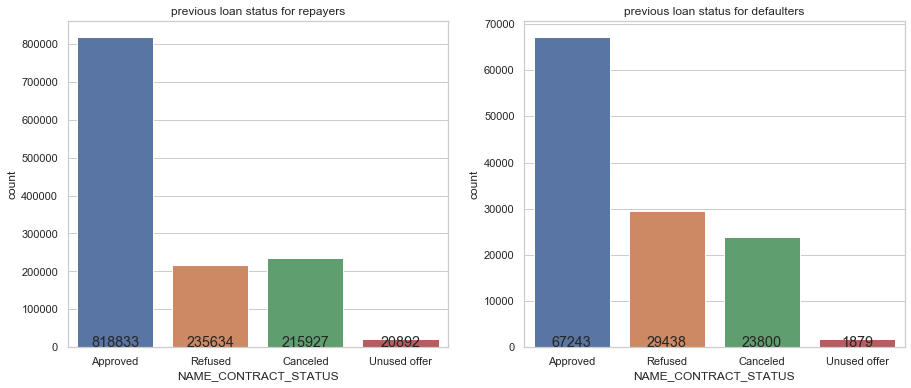

In [126]:
#checking the loan status for previous application w.r.t Target variable

plt.figure(figsize = (15,6))
plt.subplot(121)
sns.countplot(pre_repayer.NAME_CONTRACT_STATUS)
plt.title("previous loan status for repayers")
x = list(pre_repayer.NAME_CONTRACT_STATUS.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')

plt.subplot(122)
sns.countplot(pre_defaulter.NAME_CONTRACT_STATUS)
plt.title("previous loan status for defaulters")
x = list(pre_defaulter.NAME_CONTRACT_STATUS.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')

plt.show()

##### An interesting insight can be drawn from above plot is that:
- count of approved application for current repayers is more as compared to defaulters.
- previous application was comparetively highly refused for current repayers than current defaulters.

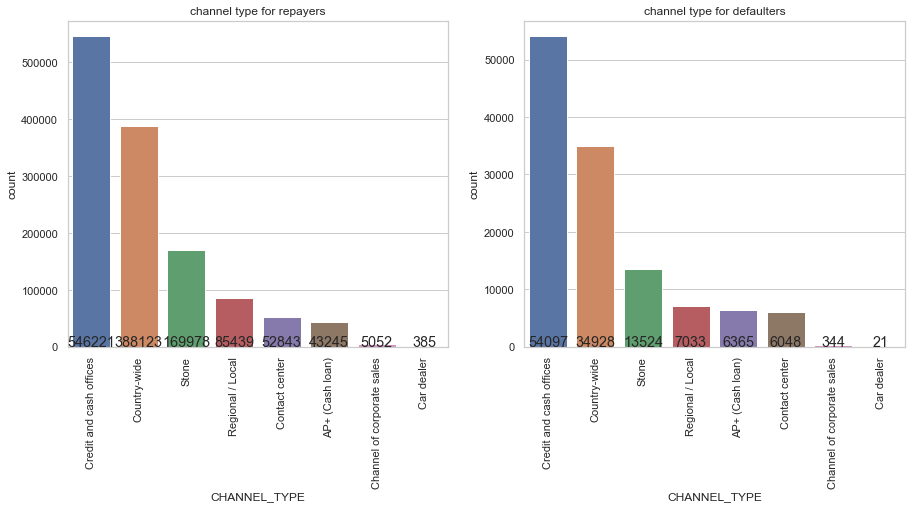

In [127]:
# Channel types customers prefer for applying for loan.
plt.figure(figsize = (15,6))
plt.subplot(121)
graph = sns.countplot(pre_repayer.CHANNEL_TYPE,order=pre_repayer.CHANNEL_TYPE.value_counts().index)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
plt.title("channel type for repayers")
x = list(pre_repayer.CHANNEL_TYPE.value_counts())
for i, v in enumerate(x):
    plt.text(i, v/x[i], x[i], fontsize='large', ha='center')

plt.subplot(122)
grap = sns.countplot(pre_defaulter.CHANNEL_TYPE,order=pre_defaulter.CHANNEL_TYPE.value_counts().index)
grap.set_xticklabels(grap.get_xticklabels(),rotation = 90)
plt.title("channel type for defaulters")
y = list(pre_defaulter.CHANNEL_TYPE.value_counts())
for i, v in enumerate(y):
    plt.text(i, v/y[i], y[i], fontsize='large', ha='center')

plt.show()


Above we can see that mostly Credit and cash offices are preffered as the channel type for both target segments

In [128]:
# Adding TARGET_NUM column derived from TARGET to curr_attr dataframe to plot heatmaps
def target(x):
    if x=='N':
        return 0
    elif x=='Y':
        return 1

curr_attr['TARGET_NUM'] = curr_attr.TARGET.apply(target)

In [129]:
curr_attr.TARGET_NUM.value_counts()

0    282682
1     24825
Name: TARGET_NUM, dtype: int64

#### Loan decision vs Loan type

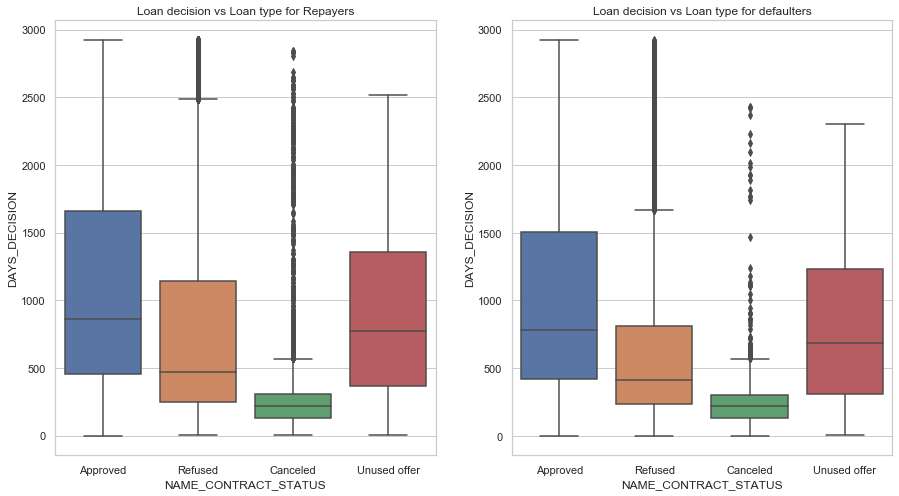

In [130]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.boxplot(y = abs(pre_repayer.DAYS_DECISION) , x = pre_repayer.NAME_CONTRACT_STATUS)
plt.title("Loan decision vs Loan type for Repayers")
plt.subplot(122)
sns.boxplot(y = abs(pre_defaulter.DAYS_DECISION) , x = pre_defaulter.NAME_CONTRACT_STATUS)
plt.title("Loan decision vs Loan type for defaulters")
plt.show()

From above distribution we can se that CANCELLED and UNUSED took many days of decision , although the Refused loan type for Repayers are vastly distributed even above the peak quantile range.

#### Region rating vs Total income range

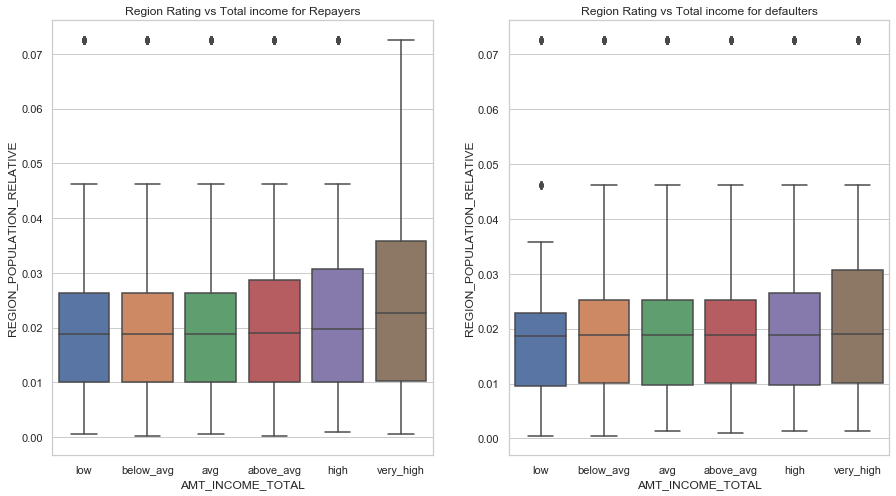

In [131]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.boxplot(x = pre_repayer.AMT_INCOME_TOTAL , y = pre_repayer.REGION_POPULATION_RELATIVE)
plt.title("Region Rating vs Total income for Repayers")
plt.subplot(122)
sns.boxplot(x = pre_defaulter.AMT_INCOME_TOTAL , y = pre_defaulter.REGION_POPULATION_RELATIVE)
plt.title("Region Rating vs Total income for defaulters")
plt.show()

From above distribution we can se that although most customers fall under high region rating but distribution is more vastly distributed for Repayers rather than defaulters.

#### Age vs Contract Status

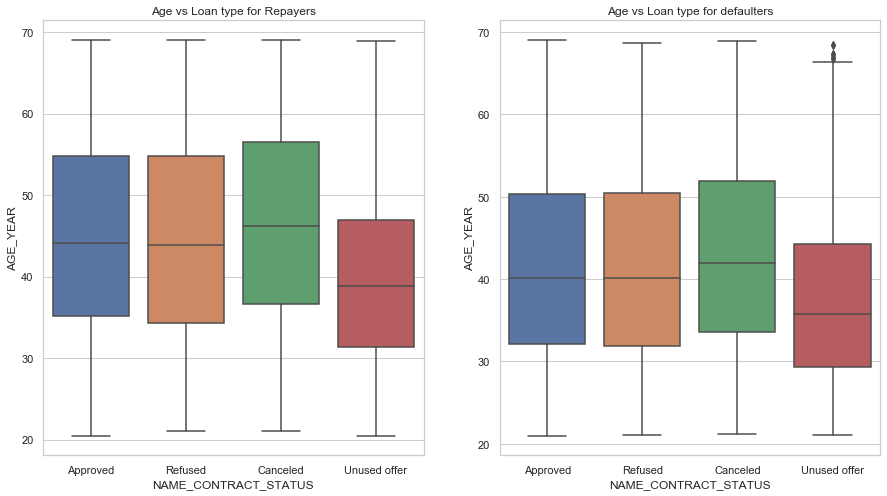

In [132]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.boxplot(y = pre_repayer.AGE_YEAR , x = pre_repayer.NAME_CONTRACT_STATUS)
plt.title("Age vs Loan type for Repayers")
plt.subplot(122)
sns.boxplot(y = pre_defaulter.AGE_YEAR , x = pre_defaulter.NAME_CONTRACT_STATUS)
plt.title("Age vs Loan type for defaulters")
plt.show()

Customers who repaid the loan and have their previous application approved are more distributed in the upper age group range wherin defaulters having their loan contract approved in the lower age -group.


### ----------------------------------------------------------------------------------------------------------------------------------------------------

##### Based on our analysis, we have identified the following governing variables which need to be considered by the banks before offering the loans.

- Amount variables eg:(AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE')
- Age group
- 'EXT_SOURCE_2' and 'EXT_SOURCE_3'
- CHANNEL_TYPE for applying for loan
- OCCUPATION_TYPE
- REGION_RATING_CLIENT


<font color = blue>

#### Submission by:
    
- Arushi Shree
- Abhishek Porwal
 </font>